# Import required packages

# Importing necessary libraries
import numpy as np  # Numerical computation library
import pandas as pd  # Data manipulation and analysis library
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Statistical data visualization library
from datetime import datetime  # Handling date and time formats

# Importing Scikit-Learn machine learning libraries
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardization (Z-score normalization)
from sklearn.preprocessing import OneHotEncoder  # One-hot encoding for categorical variables
from sklearn.compose import ColumnTransformer  # Applying different preprocessing to different columns
from sklearn.pipeline import Pipeline  # Creating machine learning workflows
from sklearn.impute import SimpleImputer  # Handling missing values

# Importing machine learning models
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classifier
from sklearn.svm import SVC  # Support Vector Machine (SVM)
from sklearn.linear_model import LogisticRegression  # Logistic Regression
import lightgbm as lgb  # LightGBM Classifier
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron Classifier (MLP)

# Model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

# Model selection and hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, TimeSeriesSplit

# Saving and loading models
import joblib

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)


# Loading the dataset


In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "SEO 2000 - 2009.csv"
df = pd.read_csv(file_path)
df

,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,Secondary__Shs_Ofrd___sum_of_all,Sec_Shs__as___of_Shs__Ofrd___sum,Sec_Shs__as___of_Shs_Ofrd___in__,Secondary__Shs_Ofrd____in_this_0,Serial,Shareholder_Take_Up_All_Markets_,Shares_Ofrd_as___of_Shs_Out_Bef_,Total_Shares_Offered__mil_,Simul__taneous_Offer_Cusip,Stock_Price_at_Close_of_Offer__0
0,1,.,NaN,NaN,NaN,.,.,.,.,14846C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,.,NaN,NaN,NaN,.,.,.,.,18886P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,.,NaN,NaN,NaN,.,.,.,.,29353W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,.,NaN,NaN,NaN,.,.,.,.,42212J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,.,NaN,NaN,NaN,.,.,.,.,46688X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,10439,.,NaN,NaN,NaN,.,.,.,.,84663K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.751,NaN,NaN
10439,10440,.,NaN,NaN,NaN,.,.,.,.,88588P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.149,NaN,NaN
10440,10441,.,NaN,NaN,NaN,.,.,.,.,941845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000,NaN,NaN
10441,10442,.,NaN,NaN,NaN,.,.,.,.,973146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.833,NaN,NaN


In [2]:
# Display missing value information

# Compute missing values count per column
missing_values = df.isna().sum()

# Compute missing values percentage
missing_percentage = (missing_values / len(df)) * 100

# Combine into DataFrame for visualization组合成 DataFrame
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Only display columns with missing values, sorted by missing count (descending)
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

# Display top 30 columns with missing values
missing_info.head(30)

,Missing Values,Percentage
Current__Sec_Shs__Filed___sum__o,10427,99.846787
Sec_Shs__Filed_as____of_Shs__Fi0,10384,99.435028
Secondary__Shs_Filed___in_this_M,10383,99.425452
Shareholder_Take_Up_All_Markets_,10324,98.860481
Date_Withdrawn,10275,98.391267
Date_Withdrawn__Postponed,10259,98.238054
Amt_Filed_using_Hi__File_Pr___su,10237,98.027387
Amended__Sec_Shs__Filed_as____of,9954,95.317438
Amended__Secondary__Shs_Filed___,9953,95.307862
Amended_Secondary_Amount_Filed_T,9949,95.269559


# Data preprocessing

### Removes rows and columns with more than 90% missing values

In [3]:
# Define a threshold for dropping columns (e.g. 90% missing values)
threshold = 0.9

# Replace "." with NaN to standardize missing values
df.replace('.', pd.NA, inplace=True)

# Calculate missing value percentage for each column
missing_percentage = df.isnull().mean()

# Identify columns to drop (those exceeding the threshold)
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned



,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,Overallot__Amt_Option___in_this_,Overallot__Amt_Sold___sum_of_all,Price_Current,Prices_Update,Deal_Number,Master_Deal_Type,Serial,Shares_Ofrd_as___of_Shs_Out_Bef_,Total_Shares_Offered__mil_,Stock_Price_at_Close_of_Offer__0
0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,14846C,...,0.0,NaN,NaN,NaN,1314518012,PC,NaN,NaN,NaN,NaN
1,2,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,18886P,...,0.0,NaN,NaN,NaN,1314068013,PCP,NaN,NaN,NaN,NaN
2,3,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,29353W,...,0.0,NaN,NaN,NaN,1313893013,PCP,NaN,NaN,NaN,NaN
3,4,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,42212J,...,0.0,NaN,NaN,NaN,1314515012,PC,NaN,NaN,NaN,NaN
4,5,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,46688X,...,0.0,NaN,NaN,NaN,1314511012,PC,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,10439,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,84663K,...,0.0,NaN,NaN,NaN,2174612012,PC,NaN,NaN,5.751,NaN
10439,10440,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,88588P,...,0.0,NaN,NaN,NaN,2157225012,PC,NaN,NaN,1.149,NaN
10440,10441,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,941845,...,0.0,NaN,NaN,NaN,2157643012,PC,NaN,NaN,12.000,NaN
10441,10442,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,973146,...,0.0,NaN,NaN,NaN,2157211012,PC,NaN,NaN,4.833,NaN


### Drop defines duplicate columns

In [4]:
# Define the groups of duplicate columns
duplicate_groups = [
    ["Issue_Date","Issue_Date1", "Issue_Date2", "Issue_Date3"],
    ["Sec_Shrs_Filed_as___of_Shares_Am", "Amended_Sec_Shs_Filed_as_of"],
    ["Shares__Offered____in_this_Mkt1", "Shares__Offered____in_this_Mkt"],
    ["Original_Middle_of_Filing_Price0", "Original_Middle_of_Filing_Price_"],
    ["Gross__Spread____in_this__Mkt__0", "Gross__Spread____in_this__Mkt___"],
    ["Proceeds_Amt___in__this_Mkt____0", "Proceeds_Amt___in__this_Mkt____m"],
    ["Sec_Shs_as____of_Shs__Out_Aft__O", "_Of_Insider_Shares_After_Offer"],
    ["Sec_Shs_as____of_Shs__Out_Bef__O", "_Of_Insider_Shares_Before_Offer"],
    ["Sec_Shs__Filed_as____of_Shs__Fi0", "Sec_Shs__Filed_as____of_Shs__Fil", "Sec_Shrs_Filed_as___of_Shares"],
    ["Secondary__Shs_Ofrd___sum_of_all", "Sec_Shs__as___of_Shs__Ofrd___sum", "Secondary__Shs_Ofrd___sum_of__al"],
    ["Stock_Price_at_Close_of_Offer__0", "Stock_Price_at_Close_of_Offer__1"]
]

# Identify the best column to keep from each group
columns_to_keep = set()
columns_to_remove = set()

for group in duplicate_groups:
    valid_columns = [col for col in group if col in df_cleaned.columns]  # Ensure column exists in df
    if valid_columns:
        # Count missing values for each column
        missing_counts = df_cleaned[valid_columns].isna().sum()
        best_column = missing_counts.idxmin()  # Select the column with the least missing values
        columns_to_keep.add(best_column)
        columns_to_remove.update(set(valid_columns) - {best_column})  # Mark other columns for removal

# Drop the redundant columns
df_removed = df_cleaned.drop(columns=columns_to_remove)

df_removed

,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,Overallot__Amt_Option___in_this_,Overallot__Amt_Sold___sum_of_all,Price_Current,Prices_Update,Deal_Number,Master_Deal_Type,Serial,Shares_Ofrd_as___of_Shs_Out_Bef_,Total_Shares_Offered__mil_,Stock_Price_at_Close_of_Offer__0
0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,14846C,...,0.0,NaN,NaN,NaN,1314518012,PC,NaN,NaN,NaN,NaN
1,2,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,18886P,...,0.0,NaN,NaN,NaN,1314068013,PCP,NaN,NaN,NaN,NaN
2,3,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,29353W,...,0.0,NaN,NaN,NaN,1313893013,PCP,NaN,NaN,NaN,NaN
3,4,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,42212J,...,0.0,NaN,NaN,NaN,1314515012,PC,NaN,NaN,NaN,NaN
4,5,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,46688X,...,0.0,NaN,NaN,NaN,1314511012,PC,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,10439,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,84663K,...,0.0,NaN,NaN,NaN,2174612012,PC,NaN,NaN,5.751,NaN
10439,10440,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,88588P,...,0.0,NaN,NaN,NaN,2157225012,PC,NaN,NaN,1.149,NaN
10440,10441,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,941845,...,0.0,NaN,NaN,NaN,2157643012,PC,NaN,NaN,12.000,NaN
10441,10442,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,973146,...,0.0,NaN,NaN,NaN,2157211012,PC,NaN,NaN,4.833,NaN


In [5]:
df_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10443 entries, 0 to 10442
Data columns (total 74 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Obs                               10443 non-null  int64  
 1   CRSP_date                         7098 non-null   object 
 2   CUSIP6                            7098 non-null   object 
 3   NCUSIP                            7098 non-null   object 
 4   CRSP_TICKER                       6972 non-null   object 
 5   PERMNO                            7098 non-null   object 
 6   PERMCO                            7098 non-null   object 
 7   PRC                               6971 non-null   object 
 8   SHROUT                            7097 non-null   object 
 9   CUSIP                             10443 non-null  object 
 10  __Digit_CUSIP                     5824 non-null   object 
 11  Ticker_Symbol                     9486 non-null   object 
 12  Sett

### Convert date format

In [6]:
df_transformed=df_removed

# Define columns that contain date information
date_columns = [
    "CRSP_date", "Settlement_Date", "Date_Filing_Amended","Issue_Date", "Payment_Date",
    "Date_Last_Updated", "Date_Created", "Filing_Date", "Prices_Update"
]

# Ensure only existing columns are processed
existing_date_columns = [col for col in date_columns if col in df_transformed.columns]

# Convert date columns
for col in existing_date_columns:
    df_transformed[col] = (
        df_transformed[col]
        .astype(str)
        .str.strip()
        .replace(["", "NA", "N/A", ".", "nan"], pd.NA) # Convert to string, strip spaces, and replace missing values
    )

    # Convert to datetime format
    df_transformed[col] = pd.to_datetime(df_transformed[col], errors='coerce', infer_datetime_format=True)

    # Fix two-digit years by adding 2000 if year < 100
    df_transformed[col] = df_transformed[col].apply(
        lambda x: x.replace(year=x.year + 2000) if pd.notna(x) and x.year < 100 else x
    )

    # Standardize date format as "YYYY/MM/DD"
    df_transformed[col] = df_transformed[col].dt.strftime("%Y/%m/%d")

C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\1227369086.py:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_transformed[col] = pd.to_datetime(df_transformed[col], errors='coerce', infer_datetime_format=True)
C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\1227369086.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_transformed[col] = pd.to_datetime(df_transformed[col], errors='coerce', infer_datetime_format=True)
C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\1227369086.py:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the def

### Convert incorrect data

In [7]:
# Process df_removed to clean specific incorrect values
df_transformed = df_removed

# Define columns to clean
columns_to_clean = [
    "Manage__ment_Fee____",
    "Under__writing_Fee____",
    "Management_Fee_as____of_Prncpl_A",
    "Underwriting_Fee_as___of__Prncpl"
]

# Ensure columns exist in the dataset
existing_columns = [col for col in columns_to_clean if col in df_removed.columns]

# Replace values containing "comb" (case insensitive) with NaN
for col in existing_columns:
    df_removed[col] = df_removed[col].apply(lambda x: None if isinstance(x, str) and 'comb' in x.lower() else x)

# Define another set of columns to clean
columns_to_clean2 = [
    "Gross_Spread_per_share_or_bond__",
    "Gross_Spread_as___of__Prncpl_Amt"
]

# Ensure columns exist in the dataset
existing_columns = [col for col in columns_to_clean2 if col in df_removed.columns]

# Replace values containing "Market" (case insensitive) with NaN
for col in existing_columns:
    df_removed[col] = df_removed[col].apply(lambda x: None if isinstance(x, str) and 'market' in x.lower() else x)

df_removed

,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,Overallot__Amt_Option___in_this_,Overallot__Amt_Sold___sum_of_all,Price_Current,Prices_Update,Deal_Number,Master_Deal_Type,Serial,Shares_Ofrd_as___of_Shs_Out_Bef_,Total_Shares_Offered__mil_,Stock_Price_at_Close_of_Offer__0
0,1,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,14846C,...,0.0,NaN,NaN,NaN,1314518012,PC,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,18886P,...,0.0,NaN,NaN,NaN,1314068013,PCP,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,29353W,...,0.0,NaN,NaN,NaN,1313893013,PCP,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,42212J,...,0.0,NaN,NaN,NaN,1314515012,PC,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,46688X,...,0.0,NaN,NaN,NaN,1314511012,PC,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,10439,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,84663K,...,0.0,NaN,NaN,NaN,2174612012,PC,NaN,NaN,5.751,NaN
10439,10440,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,88588P,...,0.0,NaN,NaN,NaN,2157225012,PC,NaN,NaN,1.149,NaN
10440,10441,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,941845,...,0.0,NaN,NaN,NaN,2157643012,PC,NaN,NaN,12.000,NaN
10441,10442,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,973146,...,0.0,NaN,NaN,NaN,2157211012,PC,NaN,NaN,4.833,NaN


### Correct wrong variable type

In [8]:
# Check data types of each column in df_transformed
column_types = df_transformed.dtypes

# Identify numeric and object type columns
numeric_columns = column_types[column_types.apply(lambda x: x in ['int64', 'float64'])].index.tolist()
object_columns = column_types[column_types == 'object'].index.tolist()

# Print numeric and object columns
print("=== numeric columns ===")
print(numeric_columns)

print("\n=== object columns ===")
print(object_columns)


=== numeric columns ===
['Obs', 'Selling_Conces__sion____', 'Re__allow__ance_Fee____', 'Selling__Concession__as___of__Pr', 'Reallowance_Fee_as___of_Prncpl_A', 'Shares__Filed____in_this_Mkt', 'Amt_Filed____in_this_Mkt_____mil', 'Total_Dollar_Amount_Filed', 'Yesterday_s_Stock_Price', 'Amended__Shs_Filed____in_this_Mk', 'Shares__Offered____in_this_Mkt1', 'Original_Middle_of_Filing_Price0', 'Deal_Size__as_Pct_of_Market_Cap', 'Gross__Spread____in_this__Mkt__0', 'Total_Manage__ment_Fee____', 'Total____Re__allow__ance_Fee____', 'Total_Re__allow__ance_Fee____mil', 'Total_Under__writing_Fee____mil_', 'Common_Equity____mil_', 'Common_Equity_Before_the_Offerin', 'Overallot__Amt_Option___in_this_', 'Overallot__Amt_Sold___sum_of_all', 'Price_Current', 'Deal_Number', 'Shares_Ofrd_as___of_Shs_Out_Bef_', 'Total_Shares_Offered__mil_', 'Stock_Price_at_Close_of_Offer__0']

=== object columns ===
['CRSP_date', 'CUSIP6', 'NCUSIP', 'CRSP_TICKER', 'PERMNO', 'PERMCO', 'PRC', 'SHROUT', 'CUSIP', '__Digit_CUSIP'

In [9]:
# Convert incorrect object columns to numeric type

# Define columns that should be numeric
columns_to_convert = [
    "Underwriting_Fee_as___of__Prncpl", "Manage__ment_Fee____", "Under__writing_Fee____",
    "Mgmt_as___Gross_Spread", "Offer_Price", "Proceeds_Amt___in__this_Mkt____0",
    "Proceeds__Amt___sum__of_all_Mkts", "Gross_Spread_per_share_or_bond__",
    "Management_Fee_as____of_Prncpl_A", "Principal_Amount____mil_", "Principal__Amt___sum__of_all_Mkt",
    "Year", "Gross_Spread_as___of__Prncpl_Amt", "SHROUT", "PRC", "PERMNO", "PERMCO"
]

# Ensure the selected columns exist in the dataset
existing_columns = [col for col in columns_to_convert if col in df_transformed.columns]

# Convert object columns to numeric, setting non-convertible values as NaN
for col in existing_columns:
    df_transformed[col] = pd.to_numeric(df_transformed[col], errors='coerce')

# Print the updated data types of converted columns
print(df_transformed[existing_columns].dtypes)


Underwriting_Fee_as___of__Prncpl    float64
Manage__ment_Fee____                float64
Under__writing_Fee____              float64
Mgmt_as___Gross_Spread              float64
Offer_Price                         float64
Proceeds_Amt___in__this_Mkt____0    float64
Proceeds__Amt___sum__of_all_Mkts    float64
Gross_Spread_per_share_or_bond__    float64
Management_Fee_as____of_Prncpl_A    float64
Principal_Amount____mil_            float64
Principal__Amt___sum__of_all_Mkt    float64
Year                                float64
Gross_Spread_as___of__Prncpl_Amt    float64
SHROUT                              float64
PRC                                 float64
PERMNO                              float64
PERMCO                              float64
dtype: object


In [10]:
df_transformed

,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,Overallot__Amt_Option___in_this_,Overallot__Amt_Sold___sum_of_all,Price_Current,Prices_Update,Deal_Number,Master_Deal_Type,Serial,Shares_Ofrd_as___of_Shs_Out_Bef_,Total_Shares_Offered__mil_,Stock_Price_at_Close_of_Offer__0
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14846C,...,0.0,NaN,NaN,NaN,1314518012,PC,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18886P,...,0.0,NaN,NaN,NaN,1314068013,PCP,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29353W,...,0.0,NaN,NaN,NaN,1313893013,PCP,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42212J,...,0.0,NaN,NaN,NaN,1314515012,PC,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46688X,...,0.0,NaN,NaN,NaN,1314511012,PC,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,10439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84663K,...,0.0,NaN,NaN,NaN,2174612012,PC,NaN,NaN,5.751,NaN
10439,10440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88588P,...,0.0,NaN,NaN,NaN,2157225012,PC,NaN,NaN,1.149,NaN
10440,10441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941845,...,0.0,NaN,NaN,NaN,2157643012,PC,NaN,NaN,12.000,NaN
10441,10442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,973146,...,0.0,NaN,NaN,NaN,2157211012,PC,NaN,NaN,4.833,NaN


# Combine outside dataset 1: Close price

In [11]:
# Load the outside dataset 1
file_path = "closeprice.csv"  # Replace with your actual file path
closeprice = pd.read_csv(file_path)
closeprice

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,iid,date,ticker,price,ccmbegdt
0,1004,P,1,LU,54594,20000,1972/4/24,E,1,2002/1/2,AIR,9.20,2001/2/1
1,1004,P,1,LU,54594,20000,1972/4/24,E,1,2002/1/3,AIR,9.66,2001/2/1
2,1004,P,1,LU,54594,20000,1972/4/24,E,1,2002/1/4,AIR,9.84,2001/2/1
3,1004,P,1,LU,54594,20000,1972/4/24,E,1,2002/1/7,AIR,9.70,2001/2/1
4,1004,P,1,LU,54594,20000,1972/4/24,E,1,2002/1/8,AIR,9.85,2001/2/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4918,P,1,LU,37832,1693,1972/12/14,E,1,2004/3/10,FFEX,6.50,2003/4/1
1048571,4918,P,1,LU,37832,1693,1972/12/14,E,1,2004/3/11,FFEX,6.59,2003/4/1
1048572,4918,P,1,LU,37832,1693,1972/12/14,E,1,2004/3/12,FFEX,6.62,2003/4/1
1048573,4918,P,1,LU,37832,1693,1972/12/14,E,1,2004/3/15,FFEX,7.04,2003/4/1


In [12]:
# Ensure primary key is in datetime format
print(df_transformed["Issue_Date"].dtypes)
print(closeprice["date"].dtypes)

object
object


In [13]:
# Convert 'Issue_Date' to datetime format
df_transformed["Issue_Date"] = pd.to_datetime(df_transformed["Issue_Date"])
df_transformed["Issue_Date"] = df_transformed["Issue_Date"].dt.strftime("%Y/%m/%d")
closeprice["date"] = pd.to_datetime(closeprice["date"], errors='coerce', infer_datetime_format=True)

# Standardize date format to "YYYY/MM/DD"
closeprice["date"] = closeprice["date"].dt.strftime("%Y/%m/%d")

C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\2528236864.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  closeprice["date"] = pd.to_datetime(closeprice["date"], errors='coerce', infer_datetime_format=True)


### Fill the Close price

In [14]:
# Merge external dataset based on Issue_Date and Ticker_Symbol
df_merged = df_transformed.merge(
    closeprice[["date", "ticker", "price"]],
    left_on=["Issue_Date", "Ticker_Symbol"],
    right_on=["date", "ticker"],
    how="left"
)

In [15]:
# Check missing values ratio
missing_ratio = df_merged["Stock_Price_at_Close_of_Offer__0"].isna().mean()
print(f"Stock_Price_at_Close_of_Offer__0 's missing ratio: {missing_ratio:.2%}")


Stock_Price_at_Close_of_Offer__0 's missing ratio: 65.38%


In [16]:
# Use closeprice [price] to fill df_transformed[Stock_Price_at_Close_of_Offer__0]'s NaN
df_merged["Stock_Price_at_Close_of_Offer__0"] = df_merged["Stock_Price_at_Close_of_Offer__0"].fillna(df_merged["price"])

# Drop unnecessary columns after merging
df_merged.drop(columns=["date", "ticker", "price"], inplace=True)
df_merged

,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,Overallot__Amt_Option___in_this_,Overallot__Amt_Sold___sum_of_all,Price_Current,Prices_Update,Deal_Number,Master_Deal_Type,Serial,Shares_Ofrd_as___of_Shs_Out_Bef_,Total_Shares_Offered__mil_,Stock_Price_at_Close_of_Offer__0
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14846C,...,0.0,NaN,NaN,NaN,1314518012,PC,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18886P,...,0.0,NaN,NaN,NaN,1314068013,PCP,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29353W,...,0.0,NaN,NaN,NaN,1313893013,PCP,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42212J,...,0.0,NaN,NaN,NaN,1314515012,PC,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46688X,...,0.0,NaN,NaN,NaN,1314511012,PC,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,10439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84663K,...,0.0,NaN,NaN,NaN,2174612012,PC,NaN,NaN,5.751,NaN
10439,10440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88588P,...,0.0,NaN,NaN,NaN,2157225012,PC,NaN,NaN,1.149,NaN
10440,10441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941845,...,0.0,NaN,NaN,NaN,2157643012,PC,NaN,NaN,12.000,NaN
10441,10442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,973146,...,0.0,NaN,NaN,NaN,2157211012,PC,NaN,NaN,4.833,NaN


In [17]:
# Check  missing values ratio again
missing_ratio = df_merged["Stock_Price_at_Close_of_Offer__0"].isna().mean()
print(f"Stock_Price_at_Close_of_Offer__0 's missing ratio: {missing_ratio:.2%}")


Stock_Price_at_Close_of_Offer__0 's missing ratio: 63.93%


In [18]:
df_transformed.Stock_Price_at_Close_of_Offer__0.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10443 entries, 0 to 10442
Series name: Stock_Price_at_Close_of_Offer__0
Non-Null Count  Dtype  
--------------  -----  
3615 non-null   float64
dtypes: float64(1)
memory usage: 81.7 KB


In [19]:
df_transformed.Offer_Price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10443 entries, 0 to 10442
Series name: Offer_Price
Non-Null Count  Dtype  
--------------  -----  
9219 non-null   float64
dtypes: float64(1)
memory usage: 81.7 KB


In [20]:
# View data structure
df_transformed

,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,Overallot__Amt_Option___in_this_,Overallot__Amt_Sold___sum_of_all,Price_Current,Prices_Update,Deal_Number,Master_Deal_Type,Serial,Shares_Ofrd_as___of_Shs_Out_Bef_,Total_Shares_Offered__mil_,Stock_Price_at_Close_of_Offer__0
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14846C,...,0.0,NaN,NaN,NaN,1314518012,PC,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18886P,...,0.0,NaN,NaN,NaN,1314068013,PCP,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29353W,...,0.0,NaN,NaN,NaN,1313893013,PCP,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42212J,...,0.0,NaN,NaN,NaN,1314515012,PC,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46688X,...,0.0,NaN,NaN,NaN,1314511012,PC,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,10439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84663K,...,0.0,NaN,NaN,NaN,2174612012,PC,NaN,NaN,5.751,NaN
10439,10440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88588P,...,0.0,NaN,NaN,NaN,2157225012,PC,NaN,NaN,1.149,NaN
10440,10441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941845,...,0.0,NaN,NaN,NaN,2157643012,PC,NaN,NaN,12.000,NaN
10441,10442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,973146,...,0.0,NaN,NaN,NaN,2157211012,PC,NaN,NaN,4.833,NaN


Since this problem is an analysis of underpricing, which is related to the Offer Price and Close Price variables, all 0 rows are deleted

In [21]:
# Drop rows where Offer_Price is NaN
df_transformed = df_transformed.dropna(subset=['Offer_Price'])
df_transformed

,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,Overallot__Amt_Option___in_this_,Overallot__Amt_Sold___sum_of_all,Price_Current,Prices_Update,Deal_Number,Master_Deal_Type,Serial,Shares_Ofrd_as___of_Shs_Out_Bef_,Total_Shares_Offered__mil_,Stock_Price_at_Close_of_Offer__0
10,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,631103,...,0.00,NaN,NaN,NaN,1314523013,PCP,NaN,NaN,33.700,NaN
15,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896239,...,0.00,NaN,NaN,NaN,1262189012,PC,NaN,NaN,1.280,NaN
18,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98446J,...,0.00,NaN,NaN,NaN,1314519015,PCD,No,NaN,NaN,NaN
19,20,2002/01/02,82966U,82966U10,SIRI,80924.0,13304.0,10.88,57456.0,82966U,...,20.35,NaN,1.84,2010/09/15,1258377002,C,NaN,27.85,13.770,9.46
21,22,2002/01/07,125141,12514110,CECE,11499.0,176.0,3.13,9614.0,125141,...,0.00,NaN,NaN,NaN,1266125012,PC,NaN,NaN,0.707,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,10439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84663K,...,0.00,NaN,NaN,NaN,2174612012,PC,NaN,NaN,5.751,NaN
10439,10440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88588P,...,0.00,NaN,NaN,NaN,2157225012,PC,NaN,NaN,1.149,NaN
10440,10441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941845,...,0.00,NaN,NaN,NaN,2157643012,PC,NaN,NaN,12.000,NaN
10441,10442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,973146,...,0.00,NaN,NaN,NaN,2157211012,PC,NaN,NaN,4.833,NaN


In [22]:
# Drop rows where Stock_Price_at_Close_of_Offer__0 is NaN
df_transformed = df_transformed.dropna(subset=['Stock_Price_at_Close_of_Offer__0'])
df_transformed

,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,Overallot__Amt_Option___in_this_,Overallot__Amt_Sold___sum_of_all,Price_Current,Prices_Update,Deal_Number,Master_Deal_Type,Serial,Shares_Ofrd_as___of_Shs_Out_Bef_,Total_Shares_Offered__mil_,Stock_Price_at_Close_of_Offer__0
19,20,2002/01/02,82966U,82966U10,SIRI,80924.0,13304.0,10.880,57456.0,82966U,...,20.35,NaN,1.84,2010/09/15,1258377002,C,NaN,27.85,13.770,9.46
24,25,2002/01/07,38141G,38141G10,GS,86868.0,35048.0,95.750,478520.0,38141G,...,197.05,NaN,107.97,2011/08/01,1259994002,C,NaN,NaN,14.126,92.50
29,30,2002/01/07,85512C,85512C20,SGH,86760.0,14237.0,19.690,3020.0,85512C,...,4.75,NaN,4.95,2010/09/15,1259631002,C,NaN,5.30,1.500,19.60
30,31,2002/01/07,85512C,85512C10,SGU,82743.0,14237.0,21.100,23394.0,85512C,...,4.75,NaN,4.95,2010/09/15,1259631002,C,NaN,5.30,1.500,19.60
34,35,2002/01/08,92552V,92552V10,VSAT,84348.0,15199.0,15.030,23820.0,92552V,...,4.35,NaN,36.23,2010/09/15,1260348002,C,NaN,NaN,2.000,15.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10423,10424,2009/12/30,231631,23163110,SRV,92240.0,52685.0,8.400,10277.0,231631,...,0.00,NaN,9.18,2010/12/31,2142884002,C,NaN,2.22,0.250,8.51
10425,10426,2009/12/30,31985E,31985E20,FCFL,89832.0,44379.0,-2.555,4151.0,31985E,...,0.00,NaN,0.29,2010/12/31,2129537002,C,NaN,14.45,0.600,2.41
10427,10428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82651B,...,0.00,NaN,2.50,2010/12/31,2144570012,R144C,NaN,NaN,0.200,7.29
10433,10434,2009/12/31,29476L,29476L10,EQR,79547.0,29940.0,33.780,276144.0,29476L,...,0.00,NaN,58.65,2011/03/25,2293049002,C,NaN,4.52,3.497,33.78


### Calculate days difference: release date and last update date

In [23]:
# Convert both columns to datetime format
df_transformed["Date_Last_Updated"] = pd.to_datetime(df_transformed["Date_Last_Updated"], format="%Y/%m/%d")
df_transformed["Issue_Date"] = pd.to_datetime(df_transformed["Issue_Date"], format="%Y/%m/%d")

# Calculate Date Difference
df_transformed["Date_Difference"] = (df_transformed["Date_Last_Updated"] - df_transformed["Issue_Date"]).dt.days
# Apply log transformation to reduce skewness
df_transformed["Date_Difference"] = np.log(df_transformed['Date_Difference']+1)

# Print results
df_transformed.Date_Difference.head(50)
df_transformed.Date_Difference.describe()

C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\1886198270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed["Date_Last_Updated"] = pd.to_datetime(df_transformed["Date_Last_Updated"], format="%Y/%m/%d")
C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\1886198270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed["Issue_Date"] = pd.to_datetime(df_transformed["Issue_Date"], format="%Y/%m/%d")
C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\1886198270.py:6: SettingWithCopyWar

count    3615.000000
mean        6.890234
std         1.297689
min         0.693147
25%         6.476972
50%         7.363914
75%         7.792349
max         8.163086
Name: Date_Difference, dtype: float64

# Combine outside dataset 2：S&P 500

In [24]:
# Load S&P 500 dataset
file_path = "S&P 500.csv"  # Import S&P 500 data
df_sp500 = pd.read_csv(file_path)
df_sp500
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     5000 non-null   object
 1   Close                    5000 non-null   object
 2   Open                     5000 non-null   object
 3   High                     5000 non-null   object
 4   Low                      5000 non-null   object
 5   Price_change_percentage  5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB


In [25]:
# Convert data format
columns_to_float = ["Close", "Open", "High", "Low"] # Columns to be converted

# Removes the thousand separator (', ') and converts it to float
df_sp500[columns_to_float] = df_sp500[columns_to_float].replace(',', '', regex=True).astype(float)

# Convert Date to datetime format
df_sp500["Date"] = pd.to_datetime(df_sp500["Date"])

# View the conversion result
print(df_sp500.dtypes)
print(df_sp500.head())


Date                       datetime64[ns]
Close                             float64
Open                              float64
High                              float64
Low                               float64
Price_change_percentage            object
dtype: object
        Date  Close   Open   High    Low Price_change_percentage
0 1990-01-02  359.7  353.4  359.7  352.0                   1.78%
1 1990-01-03  358.8  359.7  360.6  357.9                  -0.25%
2 1990-01-04  355.7  358.8  358.8  352.9                  -0.86%
3 1990-01-05  352.2  355.7  355.7  351.4                  -0.98%
4 1990-01-08  353.8  352.2  354.2  350.5                   0.45%


In [26]:
# Add new column

# Price Momentum
df_sp500["Momentum_3d"] = df_sp500["Close"] - df_sp500["Close"].shift(3)
df_sp500["Momentum_5d"] = df_sp500["Close"] - df_sp500["Close"].shift(5)

#Price Volatility
df_sp500["Intraday_Range_Percentage"] = (df_sp500["High"] - df_sp500["Low"]) / df_sp500["Open"] * 100

#RSI - Relative Strength Index
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_sp500["RSI_14"] = compute_rsi(df_sp500["Close"])

# Long-term Trend
# Calculate the difference between the 5-day and 30-day moving averages
df_sp500["SMA_Trend"] = df_sp500["Close"].rolling(window=5).mean() - df_sp500["Close"].rolling(window=30).mean() #SMA_5 > SMA_30 indicates that the market is in an upward trend. If the value is consistently positive, the market trend is upward.
df_sp500

,Date,Close,Open,High,Low,Price_change_percentage,Momentum_3d,Momentum_5d,Intraday_Range_Percentage,RSI_14,SMA_Trend
0,1990-01-02,359.7,353.4,359.7,352.0,1.78%,NaN,NaN,2.178834,NaN,NaN
1,1990-01-03,358.8,359.7,360.6,357.9,-0.25%,NaN,NaN,0.750626,NaN,NaN
2,1990-01-04,355.7,358.8,358.8,352.9,-0.86%,NaN,NaN,1.644370,NaN,NaN
3,1990-01-05,352.2,355.7,355.7,351.4,-0.98%,-7.5,NaN,1.208884,NaN,NaN
4,1990-01-08,353.8,352.2,354.2,350.5,0.45%,-5.0,NaN,1.050539,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4995,2009-10-23,1079.6,1095.6,1095.8,1075.5,-1.22%,-11.5,-8.1,1.852866,65.959184,22.210000
4996,2009-10-26,1067.0,1080.4,1091.8,1065.2,-1.17%,-14.4,-30.9,2.462051,55.086849,15.440000
4997,2009-10-27,1063.4,1067.5,1072.5,1060.6,-0.34%,-29.5,-27.7,1.114754,52.384868,9.540000
4998,2009-10-28,1042.6,1061.5,1063.3,1042.2,-1.96%,-37.0,-38.8,1.987753,41.486989,2.653333


In [27]:
# Combine dataset
df_transformed['Issue_Date'] = pd.to_datetime(df_transformed['Issue_Date'], format='%d%m%Y', errors='coerce')
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'], format='%d%m%Y', errors='coerce')
# Use 'Issue_Date' from df_transformed and 'Date' from df_sp500 for a left join
df_merged = df_transformed.merge(df_sp500, left_on='Issue_Date', right_on='Date', how='left')
# Display new features after merging
df_merged.Price_change_percentage

C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\2460564779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed['Issue_Date'] = pd.to_datetime(df_transformed['Issue_Date'], format='%d%m%Y', errors='coerce')


0        0.57%
1       -0.65%
2       -0.65%
3       -0.65%
4       -0.36%
         ...  
3610       NaN
3611       NaN
3612       NaN
3613       NaN
3614       NaN
Name: Price_change_percentage, Length: 3615, dtype: object

In [28]:
df_merged_VIX = df_merged

df_merged_VIX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Obs                               3615 non-null   int64         
 1   CRSP_date                         3560 non-null   object        
 2   CUSIP6                            3560 non-null   object        
 3   NCUSIP                            3560 non-null   object        
 4   CRSP_TICKER                       3552 non-null   object        
 5   PERMNO                            3560 non-null   float64       
 6   PERMCO                            3560 non-null   float64       
 7   PRC                               3552 non-null   float64       
 8   SHROUT                            3560 non-null   float64       
 9   CUSIP                             3615 non-null   object        
 10  __Digit_CUSIP                     3456 non-null 

In [29]:
VIX = pd.read_csv("VIX_History.csv")

VIX.head(5)

,DATE,OPEN,HIGH,LOW,CLOSE
0,1/2/2002,23.78,24.20,22.71,22.71
1,1/3/2002,22.22,22.43,21.33,21.34
2,1/4/2002,20.97,21.53,20.40,20.45
3,1/7/2002,21.41,22.15,21.35,21.94
4,1/8/2002,21.63,22.29,21.28,21.83


In [30]:
import pandas as pd

# Assuming your datasets are already loaded as dataframes
# If not, load them like this:
# data_merged_VIX = pd.read_csv('path_to_data_merged_VIX.csv')
# vix_data = pd.read_csv('path_to_vix_data.csv')

# Step 1: Convert VIX 'DATE' column to datetime
VIX['DATE'] = pd.to_datetime(VIX['DATE'])

# Step 2: Select only the 'DATE' and 'CLOSE' columns from VIX data
vix_subset = VIX[['DATE', 'CLOSE']].rename(columns={'DATE': 'Issue_Date', 'CLOSE': 'VIX_Close'})

# Step 3: Merge the datasets on the 'Issue_Date' column
merged_data = pd.merge(df_merged_VIX, vix_subset, on='Issue_Date', how='left')

# Step 4: Check the result
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 87 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Obs                               3615 non-null   int64         
 1   CRSP_date                         3560 non-null   object        
 2   CUSIP6                            3560 non-null   object        
 3   NCUSIP                            3560 non-null   object        
 4   CRSP_TICKER                       3552 non-null   object        
 5   PERMNO                            3560 non-null   float64       
 6   PERMCO                            3560 non-null   float64       
 7   PRC                               3552 non-null   float64       
 8   SHROUT                            3560 non-null   float64       
 9   CUSIP                             3615 non-null   object        
 10  __Digit_CUSIP                     3456 non-null 

In [31]:
# create key permno*date and permno*year
# remonve .0 in PERMNO
merged_data['PERMNO'] = merged_data['PERMNO'].astype(str).str[:-2]

merged_data['key_permno_date'] = merged_data['PERMNO'].astype(str) + '*' + merged_data['Issue_Date'].astype(str) 

# create key permno*year
merged_data['issue_year'] = merged_data['Issue_Date'].astype(str).str[:4]
merged_data['key_permno_year'] = merged_data['PERMNO'].astype(str) + '*' + merged_data['issue_year'].astype(str) 

# create permno*previous year
merged_data['issue_year'] = merged_data['issue_year'].astype(int)
merged_data['issue_year'] = merged_data['issue_year'] - 1
merged_data['issue_year'] = merged_data['issue_year'].astype(str)
merged_data['key_permno_previous_year'] = merged_data['PERMNO'].astype(str) + '*' + merged_data['issue_year']

merged_data.head()
print(merged_data.shape)

(3615, 91)


In [32]:
stock_daily = pd.read_csv("stock_daily.csv")

# create unique key permno+date
stock_daily['LPERMNO'] = pd.to_numeric(stock_daily['LPERMNO'], errors='coerce')
stock_daily['LPERMNO'] = stock_daily['LPERMNO'].astype('Int64')
stock_daily['datadate'] = pd.to_datetime(stock_daily['datadate'])
stock_daily['datadate'] = stock_daily['datadate'].dt.strftime('%Y-%m-%d')
stock_daily['permno_date_key'] = stock_daily['LPERMNO'].astype(str) + '*' + stock_daily['datadate']

stock_daily

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,iid,datadate,conm,cshoc,cshtrd,prccd,ccmbegdt,permno_date_key
0,1004,P,1,LU,54594,20000,1972-04-24,E,1,1999-01-04,AAR CORP,27723000.0,66400.0,22.75000,1998-02-01,54594*1999-01-04
1,1004,P,1,LU,54594,20000,1972-04-24,E,1,1999-01-05,AAR CORP,27723000.0,53200.0,22.87500,1998-02-01,54594*1999-01-05
2,1004,P,1,LU,54594,20000,1972-04-24,E,1,1999-01-06,AAR CORP,27723000.0,333300.0,22.28125,1998-02-01,54594*1999-01-06
3,1004,P,1,LU,54594,20000,1972-04-24,E,1,1999-01-07,AAR CORP,27723000.0,112600.0,22.56250,1998-02-01,54594*1999-01-07
4,1004,P,1,LU,54594,20000,1972-04-24,E,1,1999-01-08,AAR CORP,27723000.0,43700.0,22.12500,1998-02-01,54594*1999-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6831064,282553,P,1,LC,82678,14266,2010-10-18,E,1,2010-12-27,CDTI ADVANCED MATERIALS INC,3788000.0,33577.0,10.63000,2010-01-01,82678*2010-12-27
6831065,282553,P,1,LC,82678,14266,2010-10-18,E,1,2010-12-28,CDTI ADVANCED MATERIALS INC,3948000.0,19678.0,10.42560,2010-01-01,82678*2010-12-28
6831066,282553,P,1,LC,82678,14266,2010-10-18,E,1,2010-12-29,CDTI ADVANCED MATERIALS INC,3948000.0,25573.0,10.01480,2010-01-01,82678*2010-12-29
6831067,282553,P,1,LC,82678,14266,2010-10-18,E,1,2010-12-30,CDTI ADVANCED MATERIALS INC,3948000.0,14732.0,9.99000,2010-01-01,82678*2010-12-30


In [33]:
fundamental_data = pd.read_csv("company_fundamental _main.csv")


# create unique key permno+year
fundamental_data['permno'] = pd.to_numeric(fundamental_data['permno'], errors='coerce')
fundamental_data['permno'] = fundamental_data['permno'].astype('Int64')
# create year column from public_date year
fundamental_data['year'] = pd.to_datetime(fundamental_data['public_date']).dt.year
fundamental_data['year'] = pd.to_numeric(fundamental_data['year'], errors='coerce')
fundamental_data['year'] = fundamental_data['year'].astype('Int64')
fundamental_data['permno_year_key'] = fundamental_data['permno'].astype(str) + '*' + fundamental_data['year'].astype(str)

fundamental_data.drop(columns=['adate', 'qdate','divyield','public_date'], inplace=True)

fundamental_data.drop_duplicates(subset=['permno_year_key'], keep='last', inplace=True)
fundamental_data.info()
print(fundamental_data.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 26962 entries, 11 to 310037
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   permno           26962 non-null  Int64  
 1   ps               26345 non-null  float64
 2   dpr              16769 non-null  float64
 3   roa              26739 non-null  float64
 4   roe              25743 non-null  float64
 5   accrual          26738 non-null  float64
 6   ptb              25839 non-null  float64
 7   year             26962 non-null  Int64  
 8   permno_year_key  26962 non-null  object 
dtypes: Int64(2), float64(6), object(1)
memory usage: 2.1+ MB
(26962, 9)


In [34]:
# not working yet... need to fix

# merging stock daily and merged_data using permno_date_key
merged_data = merged_data.merge(stock_daily, left_on='key_permno_date', right_on='permno_date_key', how='left')

# merging fundamental_data and merged_data using permno_year_key

merged_data = merged_data.merge(fundamental_data, left_on='key_permno_previous_year', right_on='permno_year_key', how='left')

merged_data.head()

,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,permno_date_key,permno,ps,dpr,roa,roe,accrual,ptb,year,permno_year_key
0,20,2002/01/02,82966U,82966U10,SIRI,80924,13304.0,10.88,57456.0,82966U,...,80924*2002-01-02,80924,NaN,NaN,-0.099,-0.543,-0.050,1.930,2001,80924*2001
1,25,2002/01/07,38141G,38141G10,GS,86868,35048.0,95.75,478520.0,38141G,...,86868*2002-01-07,86868,1.345,0.094,0.076,0.149,-0.030,2.471,2001,86868*2001
2,30,2002/01/07,85512C,85512C20,SGH,86760,14237.0,19.69,3020.0,85512C,...,86760*2002-01-07,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
3,31,2002/01/07,85512C,85512C10,SGU,82743,14237.0,21.10,23394.0,85512C,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
4,35,2002/01/08,92552V,92552V10,VSAT,84348,15199.0,15.03,23820.0,92552V,...,84348*2002-01-08,84348,1.901,0.000,0.162,0.069,-0.024,2.407,2001,84348*2001


In [35]:
treasury = pd.read_csv("10 Year Treasury Yield Historical Data.csv")

treasury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2508 non-null   object 
 1   Price     2508 non-null   float64
 2   Open      2508 non-null   float64
 3   High      2508 non-null   float64
 4   Low       2508 non-null   float64
 5   Vol.      0 non-null      float64
 6   Change %  2508 non-null   object 
dtypes: float64(5), object(2)
memory usage: 137.3+ KB


In [36]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Columns: 116 entries, Obs to permno_year_key
dtypes: Int64(3), datetime64[ns](3), float64(65), int64(2), object(43)
memory usage: 3.2+ MB


In [37]:
# Step 1: Prepare treasury dataset
treasury_subset = treasury[['Date', 'Change %']].copy()
treasury_subset['Date'] = pd.to_datetime(treasury_subset['Date'])  # Convert to datetime
treasury_subset['Change %'] = treasury_subset['Change %'].str.rstrip('%').astype(float)  # Convert to float
treasury_subset = treasury_subset.rename(columns={'Change %': 'Treasury_Change_Pct'})  # Rename for clarity

# Step 2: Ensure Issue_Date is datetime
merged_data['Issue_Date'] = pd.to_datetime(merged_data['Issue_Date'])

# Step 3: Sort both datasets for merge_asof
merged_data = merged_data.sort_values('Issue_Date')
treasury_subset = treasury_subset.sort_values('Date')

# Step 4: Merge using merge_asof
merged_result = pd.merge_asof(
    merged_data,
    treasury_subset,
    left_on='Issue_Date',
    right_on='Date',
    direction='backward'  # Get the most recent treasury data before or on Issue_Date
)

# Step 5: No need to drop 'Date' since it’s not included
# Verify
print("Rows after merge:", len(merged_result))
print("Columns after merge:", len(merged_result.columns))
print("Duplicates (PERMNO-Issue_Date):", merged_result.duplicated(subset=['PERMNO', 'Issue_Date']).sum())
print("\nMerged result info:")
print(merged_result.info())
print("\nSample with Treasury_Change_Pct:")
print(merged_result[['PERMNO', 'Issue_Date', 'Treasury_Change_Pct']].head())

Rows after merge: 3615
Columns after merge: 118
Duplicates (PERMNO-Issue_Date): 28

Merged result info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Columns: 118 entries, Obs to Treasury_Change_Pct
dtypes: Int64(3), datetime64[ns](4), float64(66), int64(2), object(43)
memory usage: 3.3+ MB
None

Sample with Treasury_Change_Pct:
  PERMNO Issue_Date  Treasury_Change_Pct
0  80924 2002-01-02                 2.48
1  86868 2002-01-07                -1.63
2  86760 2002-01-07                -1.63
3  82743 2002-01-07                -1.63
4  84348 2002-01-08                 0.00


In [38]:
print("Columns grouped by datatype:")
for dtype in merged_result.dtypes.unique():
    cols = merged_result.select_dtypes(include=[dtype]).columns.tolist()
    print(f"{dtype}: {len(cols)} columns")
    print(cols)
    print()

Columns grouped by datatype:
int64: 5 columns
['Obs', 'Deal_Number', 'LPERMNO', 'permno', 'year']

object: 43 columns
['CRSP_date', 'CUSIP6', 'NCUSIP', 'CRSP_TICKER', 'PERMNO', 'CUSIP', '__Digit_CUSIP', 'Ticker_Symbol', 'Settlement_Date', 'Payment_Date', 'Date_Created', 'Main_SIC_Code', 'Primary_Exchange_Where_Issuer_s_', 'Bookrunner_s_', 'Type_of_Security', 'Cur__rency', 'Marketplace', 'Primary_Exchange_Where_Issue_Wil', 'Filing_Date', 'IPO_Flag__Y_N_', 'Date_Filing_Amended', 'Domicile_Nation_Code', 'Equity___Equity_Related_Simultan', 'State', 'Issuer_Borrower_SEDOL', 'Over_Subscription_Flag', 'Prices_Update', 'Master_Deal_Type', 'Serial', 'Price_change_percentage', 'key_permno_date', 'issue_year', 'key_permno_year', 'key_permno_previous_year', 'LINKPRIM', 'LINKTYPE', 'LINKDT', 'LINKENDDT', 'datadate', 'conm', 'ccmbegdt', 'permno_date_key', 'permno_year_key']

float64: 66 columns
['PERMCO', 'PRC', 'SHROUT', 'Gross_Spread_per_share_or_bond__', 'Manage__ment_Fee____', 'Under__writing_Fe

In [39]:
# Drop Date_x and Date_y
merged_result = merged_result.drop(columns=['Date_x', 'Date_y'])

# Verify
print("Rows after drop:", len(merged_result))
print("Columns after drop:", len(merged_result.columns))
print("\nMerged result info:")
print(merged_result.info())
print("\nSample with key columns:")
print(merged_result[['PERMNO', 'Issue_Date', 'Treasury_Change_Pct']].head())

Rows after drop: 3615
Columns after drop: 116

Merged result info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Columns: 116 entries, Obs to Treasury_Change_Pct
dtypes: Int64(3), datetime64[ns](2), float64(66), int64(2), object(43)
memory usage: 3.2+ MB
None

Sample with key columns:
  PERMNO Issue_Date  Treasury_Change_Pct
0  80924 2002-01-02                 2.48
1  86868 2002-01-07                -1.63
2  86760 2002-01-07                -1.63
3  82743 2002-01-07                -1.63
4  84348 2002-01-08                 0.00


In [40]:
merged_data = merged_result

### Process the missing value data of the combined data set

In [41]:
# Calculate the proportion of missing values in each column (percentage)
missing_percentage = (merged_data.isna().sum() / len(merged_data)) * 100

# Combine into DataFrame for visualization
missing_info = pd.DataFrame({'Missing Percentage': missing_percentage})

# Only columns with missing values are displayed and sorted in descending order by missing proportion
missing_info = missing_info[missing_info['Missing Percentage'] > 0].sort_values(by='Missing Percentage', ascending=False)
missing_info


,Missing Percentage
Serial,100.000000
Amended__Shs_Filed____in_this_Mk,71.784232
Date_Filing_Amended,70.843707
Mgmt_as___Gross_Spread,59.031812
Manage__ment_Fee____,58.976487
...,...
Ticker_Symbol,0.110650
Primary_Exchange_Where_Issuer_s_,0.110650
Yesterday_s_Stock_Price,0.110650
Total_Shares_Offered__mil_,0.055325


In [42]:
print("Columns and their datatypes:")
for col in merged_data.columns:
    print(f"{col}: {merged_data[col].dtype}")

Columns and their datatypes:
Obs: int64
CRSP_date: object
CUSIP6: object
NCUSIP: object
CRSP_TICKER: object
PERMNO: object
PERMCO: float64
PRC: float64
SHROUT: float64
CUSIP: object
__Digit_CUSIP: object
Ticker_Symbol: object
Settlement_Date: object
Issue_Date: datetime64[ns]
Payment_Date: object
Date_Last_Updated: datetime64[ns]
Date_Created: object
Main_SIC_Code: object
Primary_Exchange_Where_Issuer_s_: object
Bookrunner_s_: object
Gross_Spread_per_share_or_bond__: float64
Manage__ment_Fee____: float64
Under__writing_Fee____: float64
Selling_Conces__sion____: float64
Re__allow__ance_Fee____: float64
Gross_Spread_as___of__Prncpl_Amt: float64
Management_Fee_as____of_Prncpl_A: float64
Underwriting_Fee_as___of__Prncpl: float64
Selling__Concession__as___of__Pr: float64
Reallowance_Fee_as___of_Prncpl_A: float64
Principal_Amount____mil_: float64
Principal__Amt___sum__of_all_Mkt: float64
Proceeds__Amt___sum__of_all_Mkts: float64
Offer_Price: float64
Type_of_Security: object
Cur__rency: objec

In [43]:
# Removes columns that are 100% missing
merged_data = merged_data.drop(columns=["Serial","Amended__Shs_Filed____in_this_Mk","Date_Filing_Amended","Mgmt_as___Gross_Spread","Manage__ment_Fee____","Management_Fee_as____of_Prncpl_A","Underwriting_Fee_as___of__Prncpl","Under__writing_Fee____","Total_Manage__ment_Fee____","Total_Under__writing_Fee____mil_","Reallowance_Fee_as___of_Prncpl_A","Re__allow__ance_Fee____","Total_Re__allow__ance_Fee____mil","Total____Re__allow__ance_Fee____","Overallot__Amt_Sold___sum_of_all"])
merged_data

,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,permno,ps,dpr,roa,roe,accrual,ptb,year,permno_year_key,Treasury_Change_Pct
0,20,2002/01/02,82966U,82966U10,SIRI,80924,13304.0,10.880,57456.0,82966U,...,80924,NaN,NaN,-0.099,-0.543,-0.050,1.930,2001,80924*2001,2.48
1,25,2002/01/07,38141G,38141G10,GS,86868,35048.0,95.750,478520.0,38141G,...,86868,1.345,0.094,0.076,0.149,-0.030,2.471,2001,86868*2001,-1.63
2,30,2002/01/07,85512C,85512C20,SGH,86760,14237.0,19.690,3020.0,85512C,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,-1.63
3,31,2002/01/07,85512C,85512C10,SGU,82743,14237.0,21.100,23394.0,85512C,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,-1.63
4,35,2002/01/08,92552V,92552V10,VSAT,84348,15199.0,15.030,23820.0,92552V,...,84348,1.901,0.000,0.162,0.069,-0.024,2.407,2001,84348*2001,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,10426,2009/12/30,31985E,31985E20,FCFL,89832,44379.0,-2.555,4151.0,31985E,...,89832,0.685,0.000,0.012,0.038,-0.006,0.541,2008,89832*2008,-0.66
3611,10424,2009/12/30,231631,23163110,SRV,92240,52685.0,8.400,10277.0,231631,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,-0.66
3612,10428,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,82651B,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,-0.66
3613,10434,2009/12/31,29476L,29476L10,EQR,79547,29940.0,33.780,276144.0,29476L,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1.56


### Fill the missing vallue of the final dataset

In [44]:
# Removes '%' from the Price_change_percentage column and converts it to a value
if "Price_change_percentage" in merged_data.columns:
    merged_data["Price_change_percentage"] = merged_data["Price_change_percentage"].astype(str).str.replace('%', '', regex=False)
    merged_data["Price_change_percentage"] = pd.to_numeric(merged_data["Price_change_percentage"], errors='coerce')


In [45]:
# Numerical column Fill
numerical_fill_values = {
    "Stock_Price_at_Close_of_Offer__0": merged_data["Stock_Price_at_Close_of_Offer__0"].median(),

    "Deal_Size__as_Pct_of_Market_Cap": merged_data["Deal_Size__as_Pct_of_Market_Cap"].median(),
    "Common_Equity_Before_the_Offerin": merged_data["Common_Equity_Before_the_Offerin"].median(),
    "Momentum_3d": merged_data["Momentum_3d"].median(),
    "Momentum_5d": merged_data["Momentum_5d"].median(),
    "RSI_14": merged_data["RSI_14"].median(),
    "Price_change_percentage": merged_data["Price_change_percentage"].median(),
    "Original_Middle_of_Filing_Price0": merged_data["Original_Middle_of_Filing_Price0"].median(),
    "SHROUT": merged_data["SHROUT"].median(),
    "PRC": merged_data["PRC"].median(),
    "Price_Current": merged_data["Price_Current"].median(),
    "Yesterday_s_Stock_Price": merged_data["Yesterday_s_Stock_Price"].median(),
    "Total_Shares_Offered__mil_": merged_data["Total_Shares_Offered__mil_"].median(),
    "Shares_Ofrd_as___of_Shs_Out_Bef_": merged_data["Shares_Ofrd_as___of_Shs_Out_Bef_"].median(),
    "Selling__Concession__as___of__Pr": merged_data["Selling__Concession__as___of__Pr"].median(),
    "Selling_Conces__sion____": merged_data["Selling_Conces__sion____"].median(),
    "Common_Equity____mil_": merged_data["Common_Equity____mil_"].median(),
    "Gross_Spread_as___of__Prncpl_Amt": merged_data["Gross_Spread_as___of__Prncpl_Amt"].median(),
    "Gross_Spread_per_share_or_bond__": merged_data["Gross_Spread_per_share_or_bond__"].median(),
    "Gross__Spread____in_this__Mkt__0": merged_data["Gross__Spread____in_this__Mkt__0"].median(),
    "Total_Dollar_Amount_Filed": merged_data["Total_Dollar_Amount_Filed"].median(),
    "Amt_Filed____in_this_Mkt_____mil": merged_data["Amt_Filed____in_this_Mkt_____mil"].median(),
    "Shares__Filed____in_this_Mkt": merged_data["Shares__Filed____in_this_Mkt"].median(),
    "Intraday_Range_Percentage": merged_data["Intraday_Range_Percentage"].median(),
    "Close": merged_data["Close"].median(),
    "Open": merged_data["Open"].median(),
    "High": merged_data["High"].median(),
    "Low": merged_data["Low"].median(),
}

# Fill numeric columns
for col, value in numerical_fill_values.items():
    if col in merged_data.columns:
        merged_data[col].fillna(value, inplace=True)


C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\2492062691.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna(value, inplace=True)


In [46]:
# Category type column fill

# Make sure the "Over_Subscription_Flag" column exists and fill in the blank with "Yes"
if "Over_Subscription_Flag" in merged_data.columns:
    merged_data["Over_Subscription_Flag"] = merged_data["Over_Subscription_Flag"].fillna("Yes")

categorical_fill_values = {
    "Issuer_Borrower_SEDOL": "Unknown",  # SEDOL code missing, fill with "Unknown"
    "SMA_Trend": merged_data["SMA_Trend"].mode()[0],  # Take the mode to fill the moving average trend
    "CRSP_TICKER": "Unknown",  # Missing values fill with "Unknown"
    "PERMNO": merged_data["PERMNO"].mode()[0],  # Stock unique identifier, fill with mode
    "PERMCO": merged_data["PERMCO"].mode()[0],
    "Main_SIC_Code": merged_data["Main_SIC_Code"].mode()[0],  # Take the mode number to fill the industry classification code
    "Ticker_Symbol": "Unknown",  # Stock code
    "Primary_Exchange_Where_Issuer_s_": merged_data["Primary_Exchange_Where_Issuer_s_"].mode()[0],  # Trading post
}

# Fill category type column
for col, value in categorical_fill_values.items():
    if col in merged_data.columns:
        merged_data[col].fillna(value, inplace=True)

C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\1530857982.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna(value, inplace=True)


In [47]:
# CUSIP code Fill
cusip_columns = ["__Digit_CUSIP", "CUSIP6", "NCUSIP"]

for col in cusip_columns:
    if col in merged_data.columns:
        if merged_data[col].isna().sum() / len(merged_data) < 0.1:  # If the missing value is less than 10%, fill with the mode
            merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)
        else:  #If there are many missing values, fill in "Unknown"
            merged_data[col].fillna("Unknown", inplace=True)


C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\3723074799.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)


In [48]:
# Date column fill (Forward Fill ffill + Default Fill)

# Define the default earliest date
from datetime import datetime
default_date = datetime.strptime("07/07/1997", "%d/%m/%Y").strftime("%d/%m/%Y")

for col in ["Date_Filing_Amended", "Date", "CRSP_date", "Filing_Date", "Settlement_Date", "Payment_Date"]:
    if col in merged_data.columns:
        merged_data[col].fillna(method='ffill', inplace=True)  # Fill in the previous line first
        merged_data[col].fillna(default_date, inplace=True)  # If it is still empty, fill in "07/07/1997"


C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\3781877547.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna(method='ffill', inplace=True)  # Fill in the previous line first
C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\3781877547.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data[col].fillna(method='ffill', inplace=True)  # Fill in the previous line first


In [49]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Columns: 101 entries, Obs to Treasury_Change_Pct
dtypes: Int64(3), datetime64[ns](2), float64(54), int64(2), object(40)
memory usage: 2.8+ MB


In [50]:
#VIX 
print(merged_data['VIX_Close'].isna().sum())  # Number of missing values
print(merged_data['VIX_Close'].isna().mean() * 100)  # Percentage of missing values
merged_data = merged_data.sort_values('Issue_Date')
merged_data['VIX_Close'] = merged_data['VIX_Close'].fillna(method='ffill')

2
0.05532503457814661


C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\433598751.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['VIX_Close'] = merged_data['VIX_Close'].fillna(method='ffill')


In [51]:
columns_to_impute = ["dpr", "roe", "ptb", "ps", "roa", "accrual", "cshoc", "cshtrd", "prccd", "ccmbegdt"]

merged_data[columns_to_impute] = merged_data[columns_to_impute].fillna(0)


In [52]:
# Calculate the missing column again
# Calculate the proportion of missing values in each column (percentage)
missing_percentage = (merged_data.isna().sum() / len(df_merged)) * 100

# Combine into DataFrame for visualization
missing_info = pd.DataFrame({'Missing Percentage': missing_percentage})

# Only columns with missing values are displayed and sorted in descending order by missing proportion
missing_info = missing_info[missing_info['Missing Percentage'] > 0].sort_values(by='Missing Percentage', ascending=False)
missing_info


,Missing Percentage
permno,32.309820
permno_year_key,32.309820
year,32.309820
LINKTYPE,3.042877
GVKEY,3.042877
LINKPRIM,3.042877
LIID,3.042877
LINKDT,3.042877
LPERMCO,3.042877
LPERMNO,3.042877


### Create the Underpricing column

In [53]:
# Underpricing =（Stock_Price_at_Close_of_Offer__0 - OfferPrice） / OfferPrice
merged_data["Underpricing"] = (merged_data["Stock_Price_at_Close_of_Offer__0"] - merged_data["Offer_Price"]) / merged_data["Offer_Price"]


In [54]:
# Delete outliers
# By observing there is an obvious outlier delete
threshold = merged_data["Underpricing"].quantile(0.99) # Only extreme values above 99% quantile are deleted
df_merged = merged_data[merged_data["Underpricing"] <= threshold]

# Confirm the deleted data
print(f"Outliers above 99% quantile removed, number of current data rows: {len(merged_data)}")


Outliers above 99% quantile removed, number of current data rows: 3615


### Define target

In [55]:
# If Underpricing > 0.15%, there is the problem of undervaluation, target =1, else target =0
merged_data["Target"] = merged_data["Underpricing"].apply(lambda x: 1 if x > 0.02 else 0)

# View data structure
merged_data

,Obs,CRSP_date,CUSIP6,NCUSIP,CRSP_TICKER,PERMNO,PERMCO,PRC,SHROUT,CUSIP,...,dpr,roa,roe,accrual,ptb,year,permno_year_key,Treasury_Change_Pct,Underpricing,Target
0,20,2002/01/02,82966U,82966U10,SIRI,80924,13304.0,10.880,57456.0,82966U,...,0.000,-0.099,-0.543,-0.050,1.930,2001,80924*2001,2.48,-0.039594,0
1,25,2002/01/07,38141G,38141G10,GS,86868,35048.0,95.750,478520.0,38141G,...,0.094,0.076,0.149,-0.030,2.471,2001,86868*2001,-1.63,-0.005376,0
2,30,2002/01/07,85512C,85512C20,SGH,86760,14237.0,19.690,3020.0,85512C,...,0.000,0.000,0.000,0.000,0.000,<NA>,NaN,-1.63,-0.071090,0
3,31,2002/01/07,85512C,85512C10,SGU,82743,14237.0,21.100,23394.0,85512C,...,0.000,0.000,0.000,0.000,0.000,<NA>,NaN,-1.63,-0.071090,0
4,35,2002/01/08,92552V,92552V10,VSAT,84348,15199.0,15.030,23820.0,92552V,...,0.000,0.162,0.069,-0.024,2.407,2001,84348*2001,0.00,0.036552,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,10424,2009/12/30,231631,23163110,SRV,92240,52685.0,8.400,10277.0,231631,...,0.000,0.000,0.000,0.000,0.000,<NA>,NaN,-0.66,0.125661,1
3610,10426,2009/12/30,31985E,31985E20,FCFL,89832,44379.0,-2.555,4151.0,31985E,...,0.000,0.012,0.038,-0.006,0.541,2008,89832*2008,-0.66,-0.927693,0
3612,10428,2009/12/30,024937,02493710,Unknown,n,15674.0,19.810,38255.0,82651B,...,0.000,0.000,0.000,0.000,0.000,<NA>,NaN,-0.66,0.185366,1
3613,10434,2009/12/31,29476L,29476L10,EQR,79547,29940.0,33.780,276144.0,29476L,...,0.000,0.000,0.000,0.000,0.000,<NA>,NaN,1.56,-0.045223,0


In [56]:
merged_data['Target'].value_counts()


Target
0    2059
1    1556
Name: count, dtype: int64

### Remove columns that are not relevant to the analysis

In [57]:
# Date column
# Since logistic regression can't handle dates, delete the date variable altogether【CRSP_date、Settlement_Date、Issue_Date、Payment_Date、Date_Last_Updated、Date_Created、Filing_Date、Date_Filing_Amended、Prices_Update、Date】只留下date difference？
date_columns = [
    "Settlement_Date", "Payment_Date", "Date_Last_Updated",
    "Date_Created", "Filing_Date", "Prices_Update"
] # Date column to delete

columns_to_drop = [
    "Obs", "CRSP_date", "CUSIP6", "NCUSIP", "CRSP_TICKER", "PERMNO", "PERMCO",
    "PRC", "SHROUT", "CUSIP", "__Digit_CUSIP", "Ticker_Symbol", "Main_SIC_Code",
    "Offer_Price", "key_permno_date", "issue_year", "key_permno_year",
    "key_permno_previous_year", "GVKEY", "LINKPRIM", "LIID", "LINKTYPE",
    "LPERMNO", "LPERMCO", "LINKDT", "LINKENDDT", "iid", "datadate", "conm",
    "permno_date_key", "permno", "year", "permno_year_key"
]

merged_data = merged_data.drop(columns=columns_to_drop, errors="ignore")

# Remove these columns from df_merged
merged_data = merged_data.drop(columns=date_columns)

# Confirm the deleted data structure
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3615 entries, 0 to 3614
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Issue_Date                        3615 non-null   datetime64[ns]
 1   Primary_Exchange_Where_Issuer_s_  3615 non-null   object        
 2   Bookrunner_s_                     3615 non-null   object        
 3   Gross_Spread_per_share_or_bond__  3615 non-null   float64       
 4   Selling_Conces__sion____          3615 non-null   float64       
 5   Gross_Spread_as___of__Prncpl_Amt  3615 non-null   float64       
 6   Selling__Concession__as___of__Pr  3615 non-null   float64       
 7   Principal_Amount____mil_          3615 non-null   float64       
 8   Principal__Amt___sum__of_all_Mkt  3615 non-null   float64       
 9   Proceeds__Amt___sum__of_all_Mkts  3615 non-null   float64       
 10  Type_of_Security                  3615 non-null   obj

C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\2482313077.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Unique Categories", y="Feature", data=category_counts_df, palette="viridis")


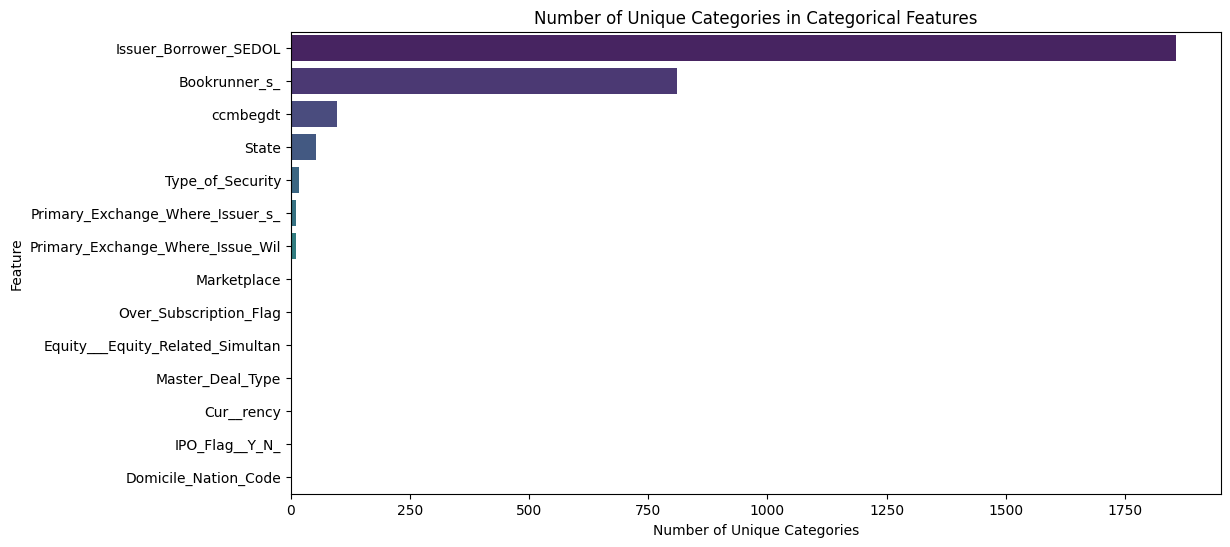

In [58]:
# Check the number of classes for the Object variable
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns
# Select all columns of type object
categorical_cols = merged_data.select_dtypes(include=["object"]).columns

# Calculate the number of unique values for each class variable
category_counts = {col: merged_data[col].nunique() for col in categorical_cols}

# Convert to DataFrame and sort
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=["Feature", "Unique Categories"])
category_counts_df = category_counts_df.sort_values(by="Unique Categories", ascending=False)

# Draw a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Unique Categories", y="Feature", data=category_counts_df, palette="viridis")
plt.xlabel("Number of Unique Categories")
plt.ylabel("Feature")
plt.title("Number of Unique Categories in Categorical Features")
plt.show()


In [59]:
# # Delete columns with too many category variables, and columns that are not relevant to the analysis
# merged_data = merged_data.drop(columns=["Bookrunner_s_","Main_SIC_Code","CUSIP6", "NCUSIP", "CRSP_TICKER", "PERMNO", "PERMCO", "CUSIP", "__Digit_CUSIP", "Ticker_Symbol", "Issuer_Borrower_SEDOL", "Deal_Number"])
# # Too many categories may cause dimensional explosion, slow computation, overfitting, model misguidance, sparse data, distance distortion, information loss, and data leakage.

# merged_data.info()

In [60]:
# Remove all columns with the same code from Domicile_Nation_Code, IPO_Flag__Y_N_, Cur__rency
merged_data = merged_data.loc[:, merged_data.nunique(dropna=True) > 1]  # Keep only columns with at least 2 unique values
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3615 entries, 0 to 3614
Data columns (total 61 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Issue_Date                        3615 non-null   datetime64[ns]
 1   Primary_Exchange_Where_Issuer_s_  3615 non-null   object        
 2   Bookrunner_s_                     3615 non-null   object        
 3   Gross_Spread_per_share_or_bond__  3615 non-null   float64       
 4   Selling_Conces__sion____          3615 non-null   float64       
 5   Gross_Spread_as___of__Prncpl_Amt  3615 non-null   float64       
 6   Selling__Concession__as___of__Pr  3615 non-null   float64       
 7   Principal_Amount____mil_          3615 non-null   float64       
 8   Principal__Amt___sum__of_all_Mkt  3615 non-null   float64       
 9   Proceeds__Amt___sum__of_all_Mkts  3615 non-null   float64       
 10  Type_of_Security                  3615 non-null   obj

### Correlation analysis

In [61]:
# Numerical variables were selected and Pearson correlation coefficients were calculated
numeric_features = merged_data.select_dtypes(include=['number']).columns
correlation_matrix = merged_data[numeric_features].corr()
correlated_features = correlation_matrix["Underpricing"].abs().sort_values(ascending=False)

# Select the top 70% highly correlated numeric columns
num_top_70 = int(len(correlated_features) * 0.7)
selected_numeric_features = correlated_features.iloc[:num_top_70].index.tolist()

print(selected_numeric_features)

['Underpricing', 'Target', 'Original_Middle_of_Filing_Price0', 'Shares__Filed____in_this_Mkt', 'prccd', 'Stock_Price_at_Close_of_Offer__0', 'Open', 'High', 'Low', 'Close', 'Gross_Spread_as___of__Prncpl_Amt', 'Shares_Ofrd_as___of_Shs_Out_Bef_', 'Treasury_Change_Pct', 'Yesterday_s_Stock_Price', 'VIX_Close', 'Price_Current', 'Gross_Spread_per_share_or_bond__', 'accrual', 'Selling__Concession__as___of__Pr', 'Selling_Conces__sion____', 'Shares__Offered____in_this_Mkt1', 'Total_Shares_Offered__mil_', 'cshtrd', 'Intraday_Range_Percentage', 'SMA_Trend', 'roa', 'Price_change_percentage', 'Amt_Filed____in_this_Mkt_____mil', 'Total_Dollar_Amount_Filed', 'Proceeds__Amt___sum__of_all_Mkts', 'Principal__Amt___sum__of_all_Mkt', 'Principal_Amount____mil_', 'Proceeds_Amt___in__this_Mkt____0', 'Deal_Size__as_Pct_of_Market_Cap']


In [62]:
# Select the category variable and calculate Cramer's V correlation
import scipy.stats as ss
from sklearn.feature_selection import f_classif

# Calculate Cramer's V correlation
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    k_corr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

categorical_features = merged_data.select_dtypes(include=['object', 'category']).columns

cramers_v_results = {}
for col in categorical_features:
    try:
        cramers_v_results[col] = cramers_v(merged_data[col], merged_data["Underpricing"])
    except:
        cramers_v_results[col] = 0 # Handle exceptions

# Select the category variables that are the top 70% relevant
cramers_v_df = pd.DataFrame(cramers_v_results.items(), columns=["Feature", "Cramér's V"])
cramers_v_df = cramers_v_df.sort_values(by="Cramér's V", ascending=False)

cat_top_70 = int(len(cramers_v_df) * 0.7)
selected_categorical_features = cramers_v_df.iloc[:cat_top_70]["Feature"].tolist()

print(selected_categorical_features)

['Marketplace', 'Master_Deal_Type', 'Type_of_Security', 'Primary_Exchange_Where_Issue_Wil', 'Bookrunner_s_', 'ccmbegdt', 'Issuer_Borrower_SEDOL']


In [63]:
# Merge filtered numeric and category variables (uncoded)
# Select numeric feature and classification feature, plus Issue_Date
df_selected = merged_data[selected_numeric_features + selected_categorical_features + ["Issue_Date"]]

# Remove the "Underpricing" column from the num_top_70 dataset
df_selected = df_selected.drop(columns=["Underpricing","Offer_Price","Stock_Price_at_Close_of_Offer__0"], errors="ignore")
# Prevent overfitting, avoid data leakage, ensure model generalization, and prevent the model from directly learning numerical patterns.

In [64]:
# View data structure
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3615 entries, 0 to 3614
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Target                            3615 non-null   int64         
 1   Original_Middle_of_Filing_Price0  3615 non-null   float64       
 2   Shares__Filed____in_this_Mkt      3615 non-null   float64       
 3   prccd                             3615 non-null   float64       
 4   Open                              3615 non-null   float64       
 5   High                              3615 non-null   float64       
 6   Low                               3615 non-null   float64       
 7   Close                             3615 non-null   float64       
 8   Gross_Spread_as___of__Prncpl_Amt  3615 non-null   float64       
 9   Shares_Ofrd_as___of_Shs_Out_Bef_  3615 non-null   float64       
 10  Treasury_Change_Pct               3615 non-null   flo

# Descriptive statistics

### Underpricing

In [65]:
# Calculate descriptive statistics
# Identifies trends, outliers, and characteristic patterns in the data
target_stats = merged_data["Underpricing"].describe()
skewness = merged_data["Underpricing"].skew()
kurtosis = merged_data["Underpricing"].kurtosis()

print("=== Underpricing Column Descriptive Statistics ===")
print(target_stats)
print(f"\nSkewness: {skewness}")  # Skewness (data symmetry)
print(f"Kurtosis: {kurtosis}")  # kurtosis (outlier trend)

=== Underpricing Column Descriptive Statistics ===
count    3615.000000
mean        0.032579
std         0.185193
min        -0.999850
25%        -0.000390
50%         0.012195
75%         0.049703
max         7.955224
Name: Underpricing, dtype: float64

Skewness: 24.56076310594579
Kurtosis: 976.9565914214935


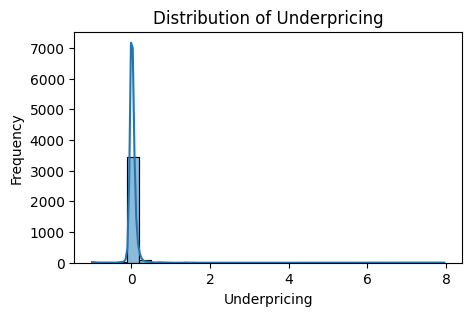

In [66]:
# Distribution of Underpricing
plt.figure(figsize=(5, 3))
sns.histplot(merged_data['Underpricing'], bins=30, kde=True)
plt.xlabel("Underpricing")
plt.ylabel("Frequency")
plt.title("Distribution of Underpricing")
plt.show()


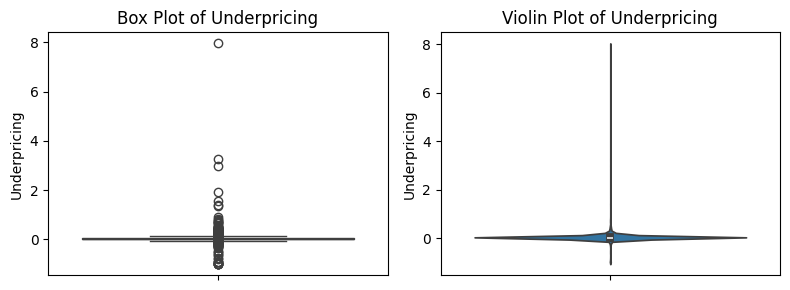

In [67]:
# Box Plot of Underpricing & Violin Plot of Underpricing
# Set the canvas
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Box Plot
sns.boxplot(y=merged_data['Underpricing'], ax=axes[0])
axes[0].set_title("Box Plot of Underpricing")
axes[0].set_ylabel("Underpricing")

# Violin Plot
sns.violinplot(y=merged_data['Underpricing'], ax=axes[1])
axes[1].set_title("Violin Plot of Underpricing")
axes[1].set_ylabel("Underpricing")

# Adjust layout
plt.tight_layout()
plt.show()


### Target

C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\181004704.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_data['Target'], ax=axes[0], palette="Blues")
C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\181004704.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_data['Target'], y=merged_data['Underpricing'], ax=axes[1], palette="Blues")


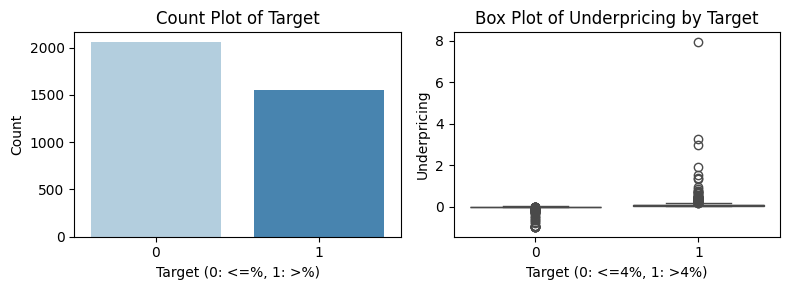

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the graph
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Calculate the distribution of Target values
sns.countplot(x=merged_data['Target'], ax=axes[0], palette="Blues")
axes[0].set_title("Count Plot of Target")
axes[0].set_xlabel("Target (0: <=%, 1: >%)")
axes[0].set_ylabel("Count")

# Calculate the relationship between Target and Underpricing
sns.boxplot(x=merged_data['Target'], y=merged_data['Underpricing'], ax=axes[1], palette="Blues")
axes[1].set_title("Box Plot of Underpricing by Target")
axes[1].set_xlabel("Target (0: <=4%, 1: >4%)")
axes[1].set_ylabel("Underpricing")

# Adjust layout
plt.tight_layout()
plt.show()


### Distribution of numeric variables

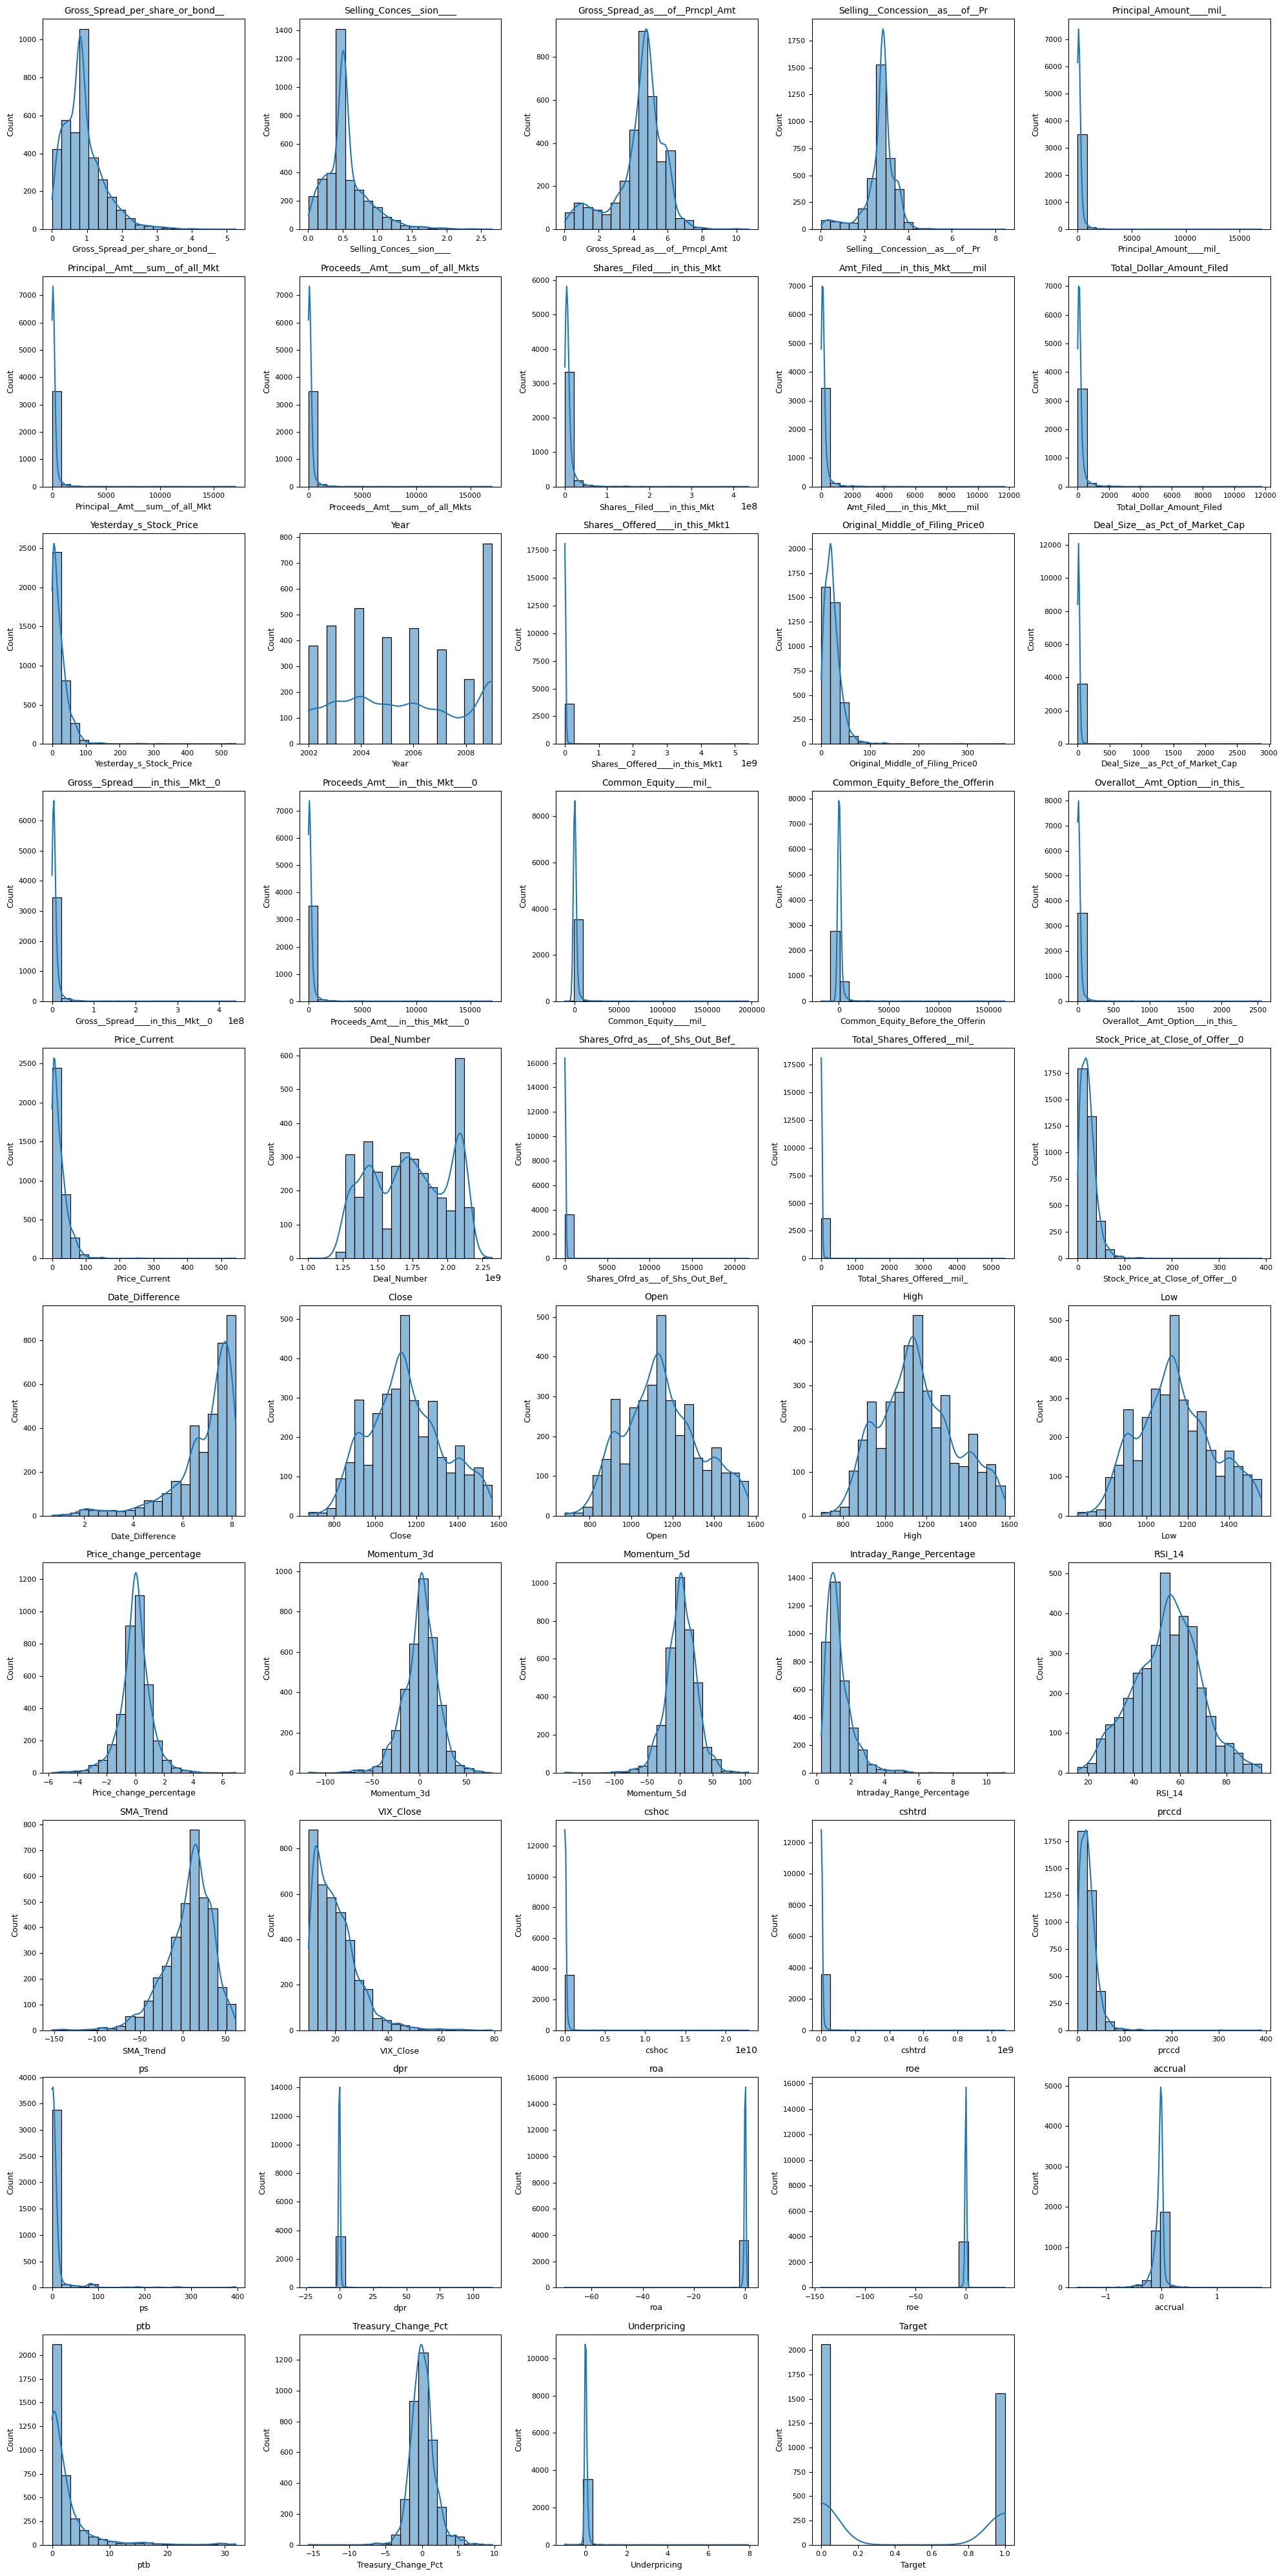

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns from merged_data
numeric_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set the size of the graph
num_cols = len(numeric_columns)
cols = 5
rows = (num_cols // cols) + 1

plt.figure(figsize=(cols * 4, rows * 4))

# Traverse the numeric columns and plot the histogram
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(merged_data[col], bins=20, kde=True)
    plt.xlabel(col, fontsize=9)
    plt.ylabel("Count", fontsize=9)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(col, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

In [70]:
# Export data for observation, but no longer import
converted_file_path = "df_final.csv"
merged_data.to_csv(converted_file_path, index=False)

# Machines Learning

### Encode the data

In [71]:
from sklearn.preprocessing import LabelEncoder
df_merged1 = pd.get_dummies(df_selected, drop_first=True)
df_merged2 = df_selected.copy()
label_encoders = {}

# Convert all categorical columns to string type
for col in df_selected.select_dtypes(include=['object', 'category']).columns:
    df_merged2[col] = df_merged2[col].astype(str)  # Convert to string
    le = LabelEncoder()
    df_merged2[col] = le.fit_transform(df_merged2[col])
    label_encoders[col] = le

# Check the number of columns
print("The number of data set columns after One-Hot Encoding:", df_merged1.shape[1])
print("The number of data set columns after Label Encoding:", df_merged2.shape[1])


The number of data set columns after One-Hot Encoding: 2825
The number of data set columns after Label Encoding: 40


In [72]:
# Check whether the data is encoded successfully
# Double check the data set for categorical variables (non-numeric)
categorical_columns1 = df_merged1.select_dtypes(include=['object']).columns.tolist()
categorical_columns1

[]

In [73]:
categorical_columns2 = df_merged2.select_dtypes(include=['object']).columns.tolist()
categorical_columns2

[]

### Decision Tree

### LightGBM

In [74]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

# Ensure dataset is sorted by time
df_merged2 = df_merged2.sort_values(by='Issue_Date')

# Divide the training set and test set
X = df_merged2.drop(columns=['Target','Issue_Date'])
y = df_merged2['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the classes in the training set
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Define the model name
model_name = "LightGBM"

# Hyperparameter tuning
param_dist = {
    "n_estimators": [50, 100, 200, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "num_leaves": [20, 31, 40, 50],
    "max_depth": [3, 5, 10, None]
}

random_search = RandomizedSearchCV(
    lgb.LGBMClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy'
)
random_search.fit(X_train_resampled, y_train_resampled)
best_lgb = random_search.best_estimator_

# Train and save model
joblib.dump(best_lgb, f"{model_name.replace(' ', '_')}.pkl")

# Predictions
y_pred = best_lgb.predict(X_test)
y_pred_proba = best_lgb.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Evaluation Metrics
print(f"\nModel Evaluation: {model_name}")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

[LightGBM] [Info] Number of positive: 1318, number of negative: 1317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8531
[LightGBM] [Info] Number of data points in the train set: 2635, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500190 -> initscore=0.000759
[LightGBM] [Info] Start training from score 0.000759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

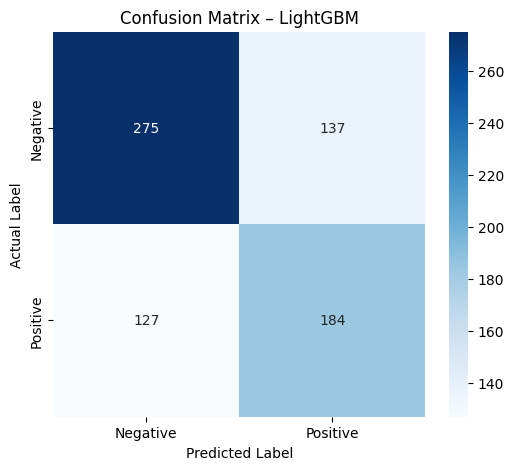

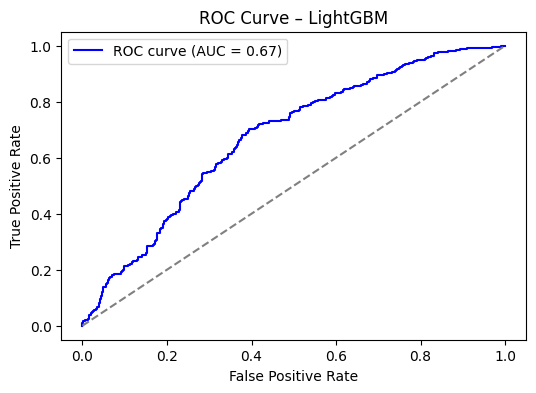

C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\3874527085.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


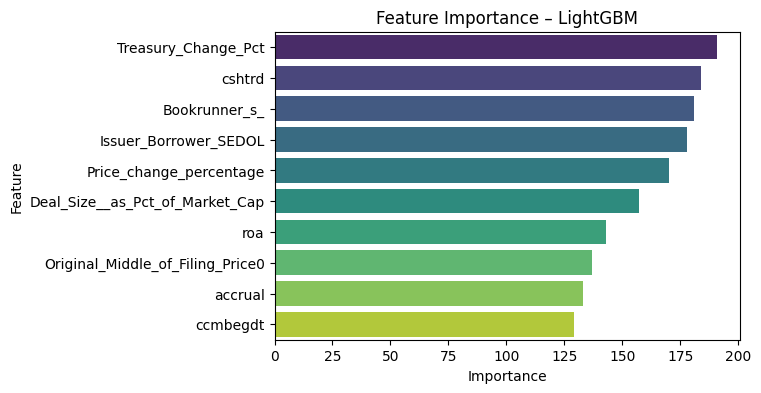

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

# Confusion Matrix
plt.figure(figsize=(6, 5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix – {model_name}")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve – {model_name}")
plt.legend()
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": best_lgb.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False).head(10)

# Figure
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title(f"Feature Importance – {model_name}")
plt.show()

### Random Forest


Model Evaluation: Random Forest
Accuracy  : 0.6390
Precision : 0.5573
Recall    : 0.7814
F1-score  : 0.6506


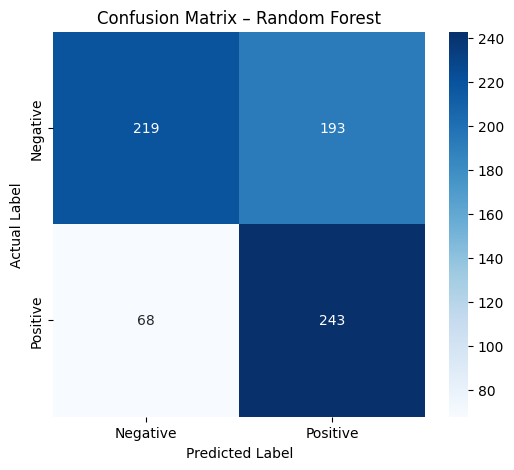

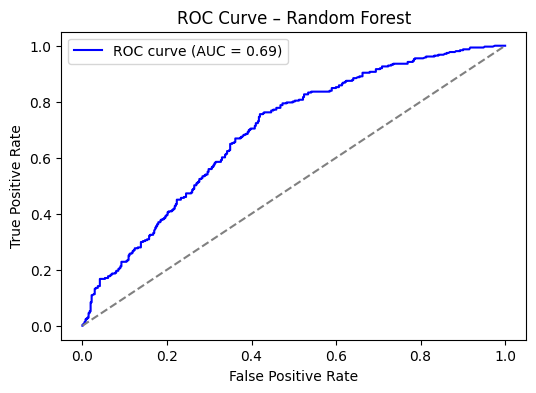

C:\Users\dicky\AppData\Local\Temp\ipykernel_1744\1260234728.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


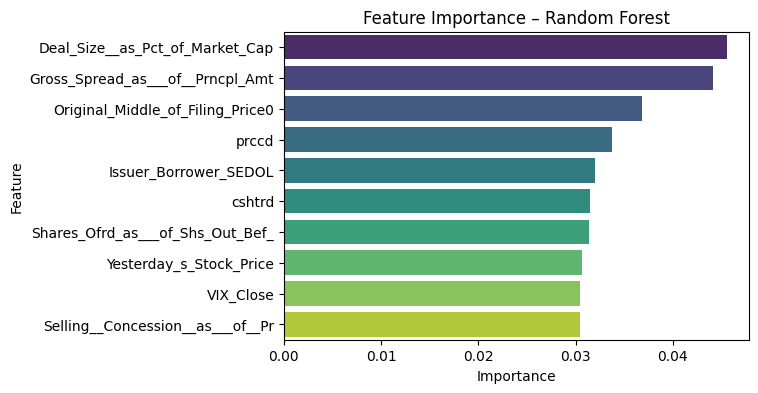

In [76]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from imblearn.over_sampling import SMOTE

# Ensure data is sorted by 'Issue_Date'
df_merged2 = df_merged2.sort_values(by='Issue_Date')

# Define features and target
X = df_merged2.drop(columns=['Target', 'Issue_Date'])
y = df_merged2['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE for class balancing in training data
sm = SMOTE(sampling_strategy=0.8, random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Define model name
model_name = "Random Forest"

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_distributions=param_dist,
    n_iter=10,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Train the model with resampled data
random_search.fit(X_train_resampled, y_train_resampled)
best_rf = random_search.best_estimator_

# Save the best model
joblib.dump(best_rf, f"{model_name.replace(' ', '_')}.pkl")

# Make predictions on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Adjust the classification threshold to improve recall
threshold = 0.4
y_pred_adjusted = (y_pred_proba > threshold).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

# Print Evaluation Metrics
print(f"\nModel Evaluation: {model_name}")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix – {model_name}")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve – {model_name}")
plt.legend()
plt.show()

# Feature Importance Plot
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title(f"Feature Importance – {model_name}")
plt.show()


### Logistic Regression

In [78]:
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Make sure the data is sorted by time
df_merged2 = df_merged2.sort_values(by='Issue_Date')

# Divide the training set and test set
X = df_merged1.drop(columns=['Target',"Issue_Date"])
y = df_merged1['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the classes in the training set
sm = SMOTE(sampling_strategy=0.8, random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Define the model name
model_name = "Logistic Regression"

# Hyperparameter tuning
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced"),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train_resampled, y_train_resampled) # Training on balanced data
best_lr = grid_search.best_estimator_

# Save the best model
joblib.dump(best_lr, f"{model_name.replace(' ', '_')}.pkl")

# Predictions
y_pred = best_lr.predict(X_test)
y_pred_proba = best_lr.predict_proba(X_test)[:, 1]

# Adjust the classification threshold, try to improve recall
threshold = 0.4
y_pred_adjusted = (y_pred_proba > threshold).astype(int)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

# Print Evaluation Metrics
print(f"\nModel Evaluation: {model_name}")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

d:\apps\Anaconda\envs\Python310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\apps\Anaconda\envs\Python310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\apps\Anaconda\envs\Python310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Model Evaluation: Logistic Regression
Accuracy  : 0.5920
Precision : 0.5171
Recall    : 0.7781
F1-score  : 0.6213


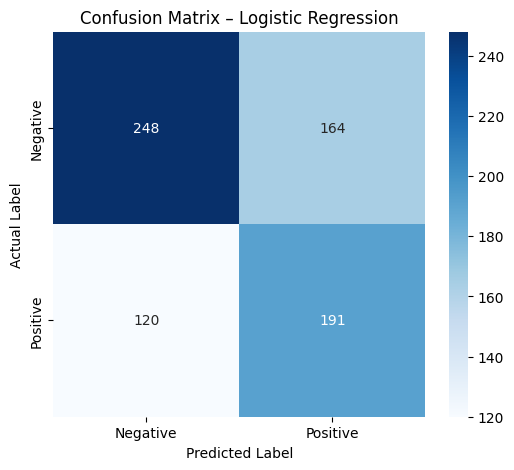

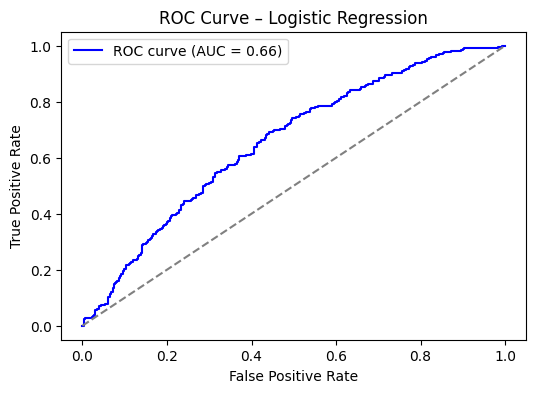

In [79]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix – {model_name}")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve – {model_name}")
plt.legend()
plt.show()

### K-Nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make sure the data is sorted by time
df_merged2 = df_merged2.sort_values(by='Issue_Date')

# Divide the training set and test set
X = df_merged1.drop(columns=['Target',"Issue_Date"])
y = df_merged1['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the model name
model_name = "K-Nearest Neighbors"

# Hyperparameter tuning
param_grid = {
    "n_neighbors": range(1, 21),
    "weights": ["uniform", "distance"]
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)  # Train on balanced data
best_knn = grid_search.best_estimator_

# Train and save model
joblib.dump(best_knn, f"{model_name.replace(' ', '_')}.pkl")

# Predictions
y_pred = best_knn.predict(X_test)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Print Evaluation Metrics
print(f"\nModel Evaluation: {model_name}")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

d:\apps\Anaconda\envs\Python310\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Model Evaluation: K-Nearest Neighbors
Accuracy  : 0.5781
Precision : 0.5096
Recall    : 0.5113
F1-score  : 0.5104


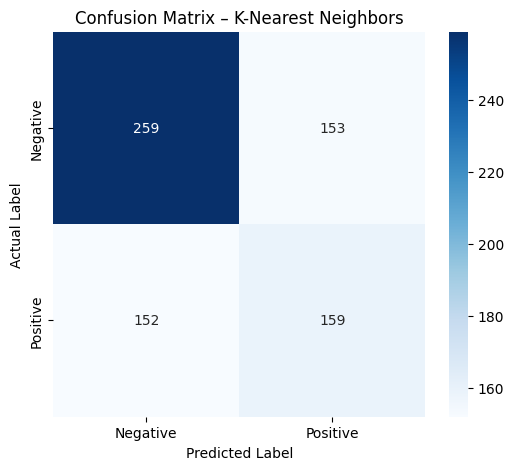

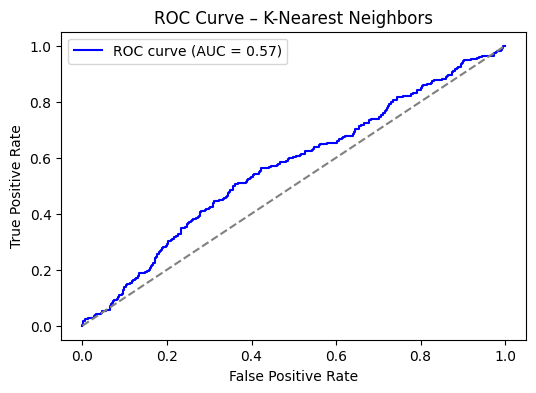

In [81]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix – {model_name}")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve – {model_name}")
plt.legend()
plt.show()
